**Context**:

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


**Objective**:

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.


**Data Description**:

* Player_Name: Name of the player.
* Club: Club in which the player plays.
* Position: Position in which the player plays.
* Goals_Scored: Number of goals scored by the player in the previous season.
* Assists: Number of passes made by the player leading to goals in the previous season.
* Total_Points: Total number of fantasy points scored by the player in the previous season.
* Minutes: Number of minutes played by the player in the previous season.
* Goals_Conceded: Number of goals conceded by the player in the previous season.
*Creativity: A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
*Influence: A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or * indirectly affect the match outcome.
* Threat: A score, computed using a range of stats, that gauges players who are most likely to score goals.
* Bonus: Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
* Clean_Sheets: Number of matches without conceding a goal in the previous season.

In [109]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import random  # Import the random module
from IPython.display import display  # Import the display function from IPython.display

# Import libraries for statistical analysis
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import linregress

# Preprocesing data for clustering
from sklearn.preprocessing import StandardScaler

# PCA Analysis
from sklearn.decomposition import PCA

# K-Means Clustering
from sklearn.cluster import KMeans

# KElbow Analysis
from scipy.spatial.distance import cdist

# K-Mediod Analysis
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

# Guassian Mixture model
from sklearn.mixture import GaussianMixture

# Dentiy Clustering - DBSCAN
from sklearn.cluster import DBSCAN

# Silhouette Analysis
from sklearn.metrics import silhouette_score
#from sklearn.metrics import silhouette_samples


import warnings
warnings.filterwarnings('ignore')

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Connect collab
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load data from csv file
data = pd.read_csv('/content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week Three - Making Sense of Unstructured Data/Fantasy Sports Clustering/fpl_data.csv')
data.head()



,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


In [3]:
data.info()

print('\n shape', data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB

 shape (476, 13)


### **Preliminary Categorical Data Analysis**

In [4]:
# Make sure a player does not have multiple entries
# Number of unique players
print ('# of players:', data['Player_Name'].nunique())

# of players: 476


In [5]:
# Number of unique clubs
print ('# of clubs:', data['Club'].nunique())

# Look at clubs
data['Club'].value_counts()


# of clubs: 17


,count
Club,
Arsenal,30
Crystal Palace,30
Leeds United,29
West Ham United,29
Tottenham Hotspurs,29
Newcastle United,29
Leicester City,29
Manchester United,28
Chelsea,28


In [6]:
# Number of unique positions
print ('# of positions:', data['Position'].nunique())

# Look at positions
data['Position'].value_counts()

# of positions: 4


,count
Position,
Midfielder,195
Defender,172
Forward,64
Goalkeeper,45


In [7]:
# Look at positions
data['Position'].value_counts()

,count
Position,
Midfielder,195
Defender,172
Forward,64
Goalkeeper,45


### **Preliminary Numerical Data Anlaysis**

In [8]:
# Look at the integers

print('Goals Scored')

# minimum number of goals
print('Minimun:', data['Goals_Scored'].min())

# maximum number of goals
print('Maximum:', data['Goals_Scored'].max())

# Quantile values
print('25%:', data['Goals_Scored'].quantile(0.25))
print('50%:', data['Goals_Scored'].quantile(0.50)) # Median value
print('75%:', data['Goals_Scored'].quantile(0.75))


Goals Scored
Minimun: 0
Maximum: 23
25%: 0.0
50%: 0.5
75%: 2.0


In [9]:
# How can the median be 0.5?

print('Players that did not score \n')
data[data['Goals_Scored'] == 0]         # so 50% of all players scored no goals

Players that did not score 



,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
5,Cedric Soares,Arsenal,Defender,0,1,28,744,11,114.8,110.8,66,3,2
6,Daniel Ceballos,Arsenal,Midfielder,0,4,62,1609,17,422.3,359.8,141,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Owen Otasowie,Wolverhampton Wanderers,Midfielder,0,1,9,185,6,25.9,38.2,34,0,0
465,Patrick Cutrone,Wolverhampton Wanderers,Forward,0,0,2,23,0,0.0,0.0,4,0,0
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10


In [10]:
# Look at creativity

print('Minimum:', data['Creativity'].min())
print('Maximum:', data['Creativity'].max())
print('25%:', data['Creativity'].quantile(0.25))
print('50%:', data['Creativity'].quantile(0.50)) # Median value
print('75%:', data['Creativity'].quantile(0.75))

print('\n\n Players with a zero creativity scoren')
data[data['Creativity'] == 0]

Minimum: 0.0
Maximum: 1414.9
25%: 8.3
50%: 96.94999999999999
75%: 296.95


 Players with a zero creativity scoren


,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
16,Matt Macey,Arsenal,Goalkeeper,0,0,0,0,0,0.0,0.0,0,0,0
17,Miguel Azeez,Arsenal,Midfielder,0,0,0,0,0,0.0,0.0,0,0,0
26,Sokratis Papastathopoulos,Arsenal,Defender,0,0,0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Lukasz Fabianski,West Ham United,Goalkeeper,0,0,133,3150,44,0.0,745.2,0,11,10
444,Roberto Jimenez Gago,West Ham United,Goalkeeper,0,0,0,0,0,0.0,0.0,0,0,0
456,John Ruddy,Wolverhampton Wanderers,Goalkeeper,0,0,4,91,1,0.0,25.4,0,0,0
465,Patrick Cutrone,Wolverhampton Wanderers,Forward,0,0,2,23,0,0.0,0.0,4,0,0


In [11]:
# Look at statistics of all numerical values) rather than continue to lok at them one at a time
data.describe()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.907563,1.752101,58.516807,1336.909664,19.157563,195.976050,294.617647,224.962185,4.718487,4.745798
std,3.455562,2.708563,51.293559,1073.773995,15.946171,251.478541,267.779681,318.240377,6.252625,4.394312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,268.750000,4.000000,8.300000,46.500000,5.750000,0.000000,0.000000
50%,0.500000,0.000000,48.000000,1269.500000,18.000000,96.950000,233.100000,104.500000,2.000000,4.000000
75%,2.000000,2.000000,94.250000,2256.250000,31.000000,296.950000,499.500000,298.250000,7.000000,8.000000
max,23.000000,14.000000,244.000000,3420.000000,68.000000,1414.900000,1318.200000,1980.000000,40.000000,19.000000


In [12]:
# What about doing the same thing for categorical features
data.describe(include='object')

,Player_Name,Club,Position
count,476,476,476
unique,476,17,4
top,Alex Runnarsson,Arsenal,Midfielder
freq,1,30,195


In [13]:
# To look at everything all at once
data.describe(include='all')

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
count,476,476,476,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
unique,476,17,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Alex Runnarsson,Arsenal,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,30,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.907563,1.752101,58.516807,1336.909664,19.157563,195.976050,294.617647,224.962185,4.718487,4.745798
std,NaN,NaN,NaN,3.455562,2.708563,51.293559,1073.773995,15.946171,251.478541,267.779681,318.240377,6.252625,4.394312
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,10.000000,268.750000,4.000000,8.300000,46.500000,5.750000,0.000000,0.000000
50%,NaN,NaN,NaN,0.500000,0.000000,48.000000,1269.500000,18.000000,96.950000,233.100000,104.500000,2.000000,4.000000
75%,NaN,NaN,NaN,2.000000,2.000000,94.250000,2256.250000,31.000000,296.950000,499.500000,298.250000,7.000000,8.000000


In [14]:
# Check for null values
data.isnull().sum()

,0
Player_Name,0
Club,0
Position,0
Goals_Scored,0
Assists,0
Total_Points,0
Minutes,0
Goals_Conceded,0
Creativity,0
Influence,0


In [15]:
# Check for duplicated data
data.duplicated().sum()

0

# **Univariate Analysis**

## **Numerical Data**

In [16]:
def histogram_boxplt_fun(data, feature, kde=False, bins=23, color=None):

    if feature == 'Total_Points':
        color = 'red'                                                                                     # Highlight the 'Total_Points' feature with red color as it is the most imprtant column for our needs
    elif color is None:
        palette = sns.color_palette("autumn", as_cmap=False)
        random.shuffle(palette)                                                                           # Shuffle the palette to ensure more variability
        color = palette[0]                                                                                # Choose the first color from the shuffled palette

    fig, ax = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]}, figsize=(12, 7))
    fig.suptitle(feature, fontsize=16)                                                                    # Set the title of the entire figure

    sns.boxplot(data=data, x=feature, ax=ax[0], color=color)
    sns.histplot(data=data, x=feature, ax=ax[1], color=color, kde=kde, bins=bins)

    # Place mean line
    mean_color = 'green'
    median_color = 'black'
    ax[0].axvline(data[feature].mean(), color=mean_color, linestyle='dashed', linewidth=2)
    ax[1].axvline(data[feature].mean(), color=mean_color, linestyle='dashed', linewidth=2)

    # Place median line on both plots
    ax[0].axvline(data[feature].median(), color=median_color, linestyle='dashdot', linewidth=2)
    ax[1].axvline(data[feature].median(), color=median_color, linestyle='dashdot', linewidth=2)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

   # Display the top 10 performers for the feature
    top_performers = data.nlargest(10, feature)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(f"\nTop 10 performers for {feature}:\n")
    styled = top_performers.style.hide(axis='index').set_table_styles([
        {'selector': 'thead th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
        {'selector': 'th.col_heading', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ]).set_properties(**{
        'border': '1px solid black',
        'padding': '10px',
    })

    display(styled)
    print("\n")

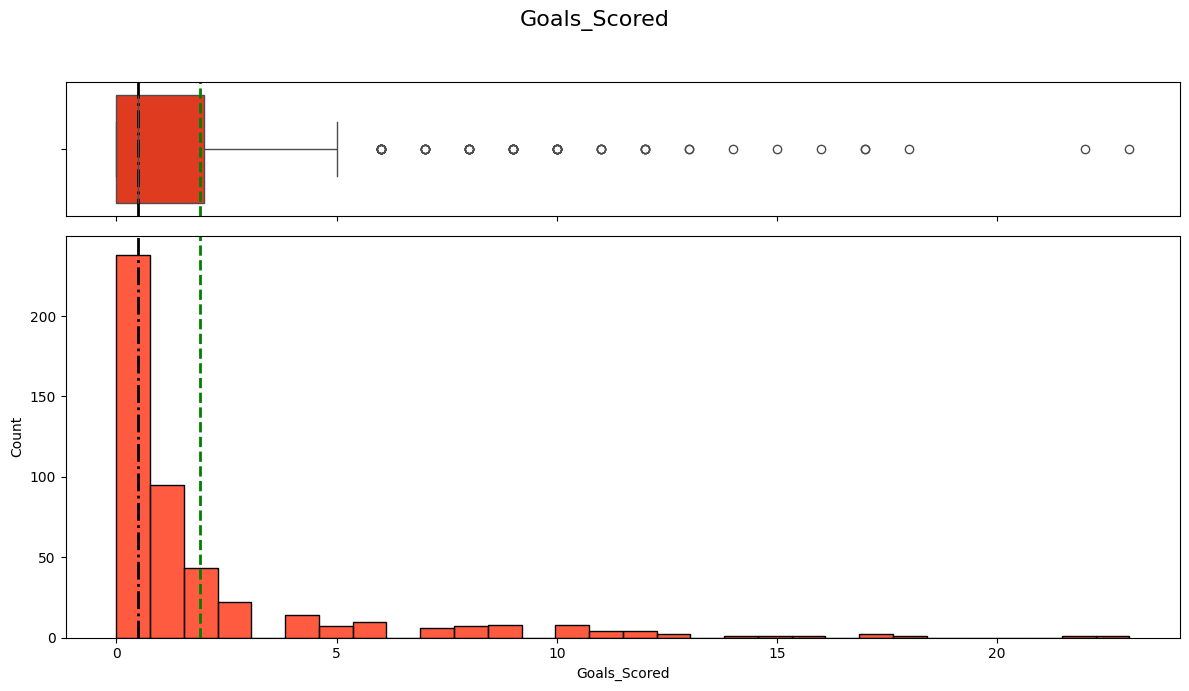


Top 10 performers for Goals_Scored:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.100000,1318.200000,1585,40,12
Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.700000,1056.000000,1980,21,11
Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.900000,1292.600000,1253,36,13
Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.000000,867.200000,1512,26,10
Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.900000,1052.200000,1046,26,13
Dominic Calvert-Lewin,Everton,Forward,16,6,165,2871,39,308.000000,745.800000,1439,21,11
Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.600000,819.200000,1306,23,8
Ollie Watkins,Aston Villa,Forward,14,9,168,3328,46,610.400000,815.400000,1721,18,14
Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.400000,602.400000,797,21,7
Ilkay Gundogan,Manchester City,Midfielder,13,4,157,2025,16,688.400000,754.600000,712,22,12


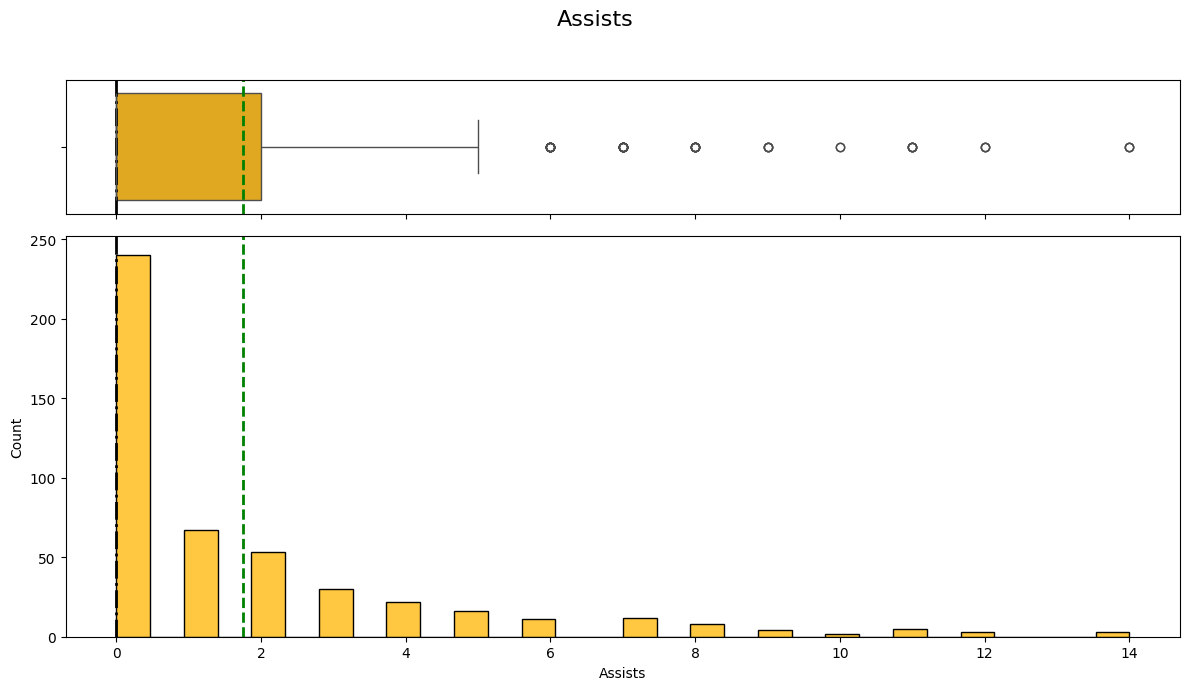


Top 10 performers for Assists:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.600000,819.200000,1306,23,8
Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.900000,1292.600000,1253,36,13
Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.100000,1318.200000,1585,40,12
Jack Grealish,Aston Villa,Midfielder,6,12,135,2183,28,1029.600000,707.400000,917,13,12
Timo Werner,Chelsea,Forward,6,12,128,2598,29,532.400000,514.800000,1276,7,13
Kevin De Bruyne,Manchester City,Midfielder,6,12,141,1995,17,1170.100000,760.800000,914,19,12
Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.000000,867.200000,1512,26,10
Sadio Mane,Liverpool,Midfielder,11,11,176,2808,28,809.700000,808.800000,1535,14,12
Marcus Rashford,Manchester United,Midfielder,11,11,174,2917,39,682.100000,793.200000,1127,9,12
Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.900000,1052.200000,1046,26,13


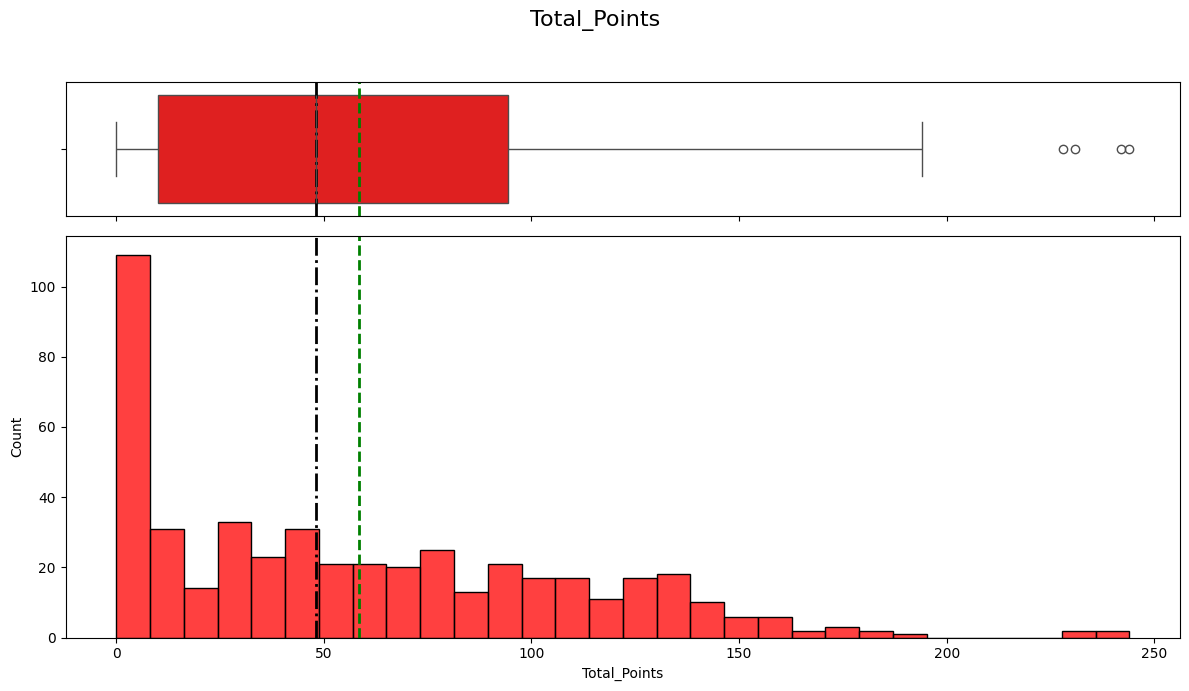


Top 10 performers for Total_Points:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.900000,1292.600000,1253,36,13
Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.100000,1318.200000,1585,40,12
Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.700000,1056.000000,1980,21,11
Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.900000,1052.200000,1046,26,13
Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.000000,867.200000,1512,26,10
Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.600000,819.200000,1306,23,8
Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.000000,1067.200000,0,27,15
Sadio Mane,Liverpool,Midfielder,11,11,176,2808,28,809.700000,808.800000,1535,14,12
Marcus Rashford,Manchester United,Midfielder,11,11,174,2917,39,682.100000,793.200000,1127,9,12
Stuart Dallas,Leeds United,Defender,8,3,171,3410,53,454.600000,756.800000,527,15,12


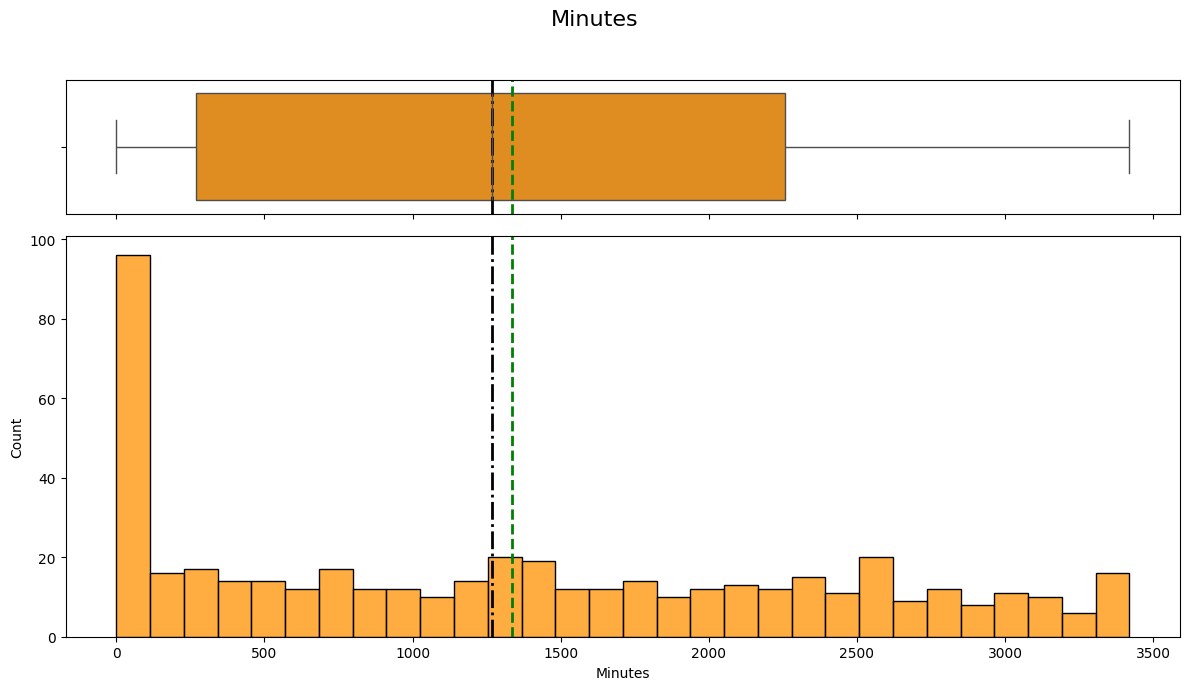


Top 10 performers for Minutes:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.000000,1067.200000,0,27,15
Kasper Schmeichel,Leicester City,Goalkeeper,0,0,128,3420,50,0.000000,769.000000,0,6,11
James Ward-Prowse,Southampton,Midfielder,8,7,156,3420,68,971.200000,940.000000,355,17,9
Hugo Lloris,Tottenham Hotspurs,Goalkeeper,0,0,149,3420,45,0.000000,868.000000,0,13,12
Pierre-Emile Hojbjerg,Tottenham Hotspurs,Midfielder,2,4,107,3420,45,308.700000,728.800000,146,6,12
Tomas Soucek,West Ham United,Midfielder,10,2,147,3420,47,271.100000,889.800000,925,16,11
Ashley Westwood,Burnley,Midfielder,3,4,112,3410,55,843.200000,559.200000,156,5,11
Stuart Dallas,Leeds United,Defender,8,3,171,3410,53,454.600000,756.800000,527,15,12
Matt Targett,Aston Villa,Defender,0,4,138,3404,44,607.000000,690.400000,122,9,16
Luke Ayling,Leeds United,Defender,0,0,100,3399,54,421.400000,843.200000,350,2,12


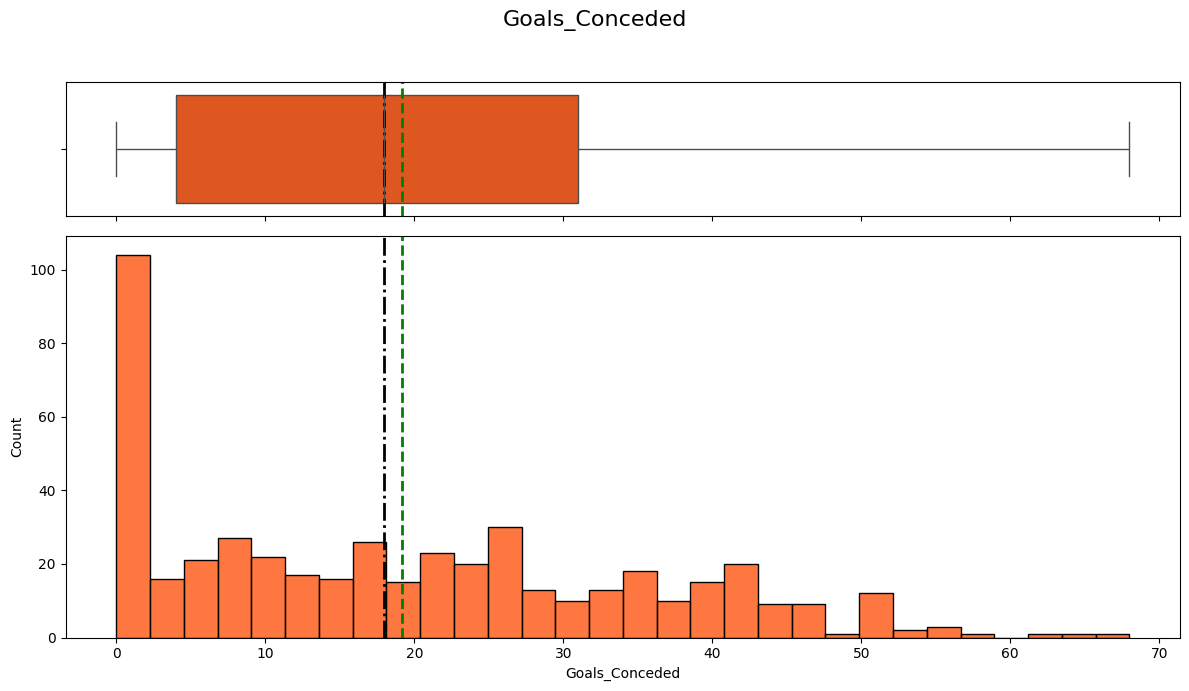


Top 10 performers for Goals_Conceded:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
James Ward-Prowse,Southampton,Midfielder,8,7,156,3420,68,971.200000,940.000000,355,17,9
Vicente Guaita,Crystal Palace,Goalkeeper,0,0,124,3330,64,0.000000,819.400000,0,15,8
Jan Bednarek,Southampton,Defender,1,1,94,3100,62,75.000000,692.000000,164,11,9
Alex McCarthy,Southampton,Goalkeeper,0,0,94,2700,57,0.000000,741.200000,0,8,7
Cheikhou Kouyate,Crystal Palace,Midfielder,1,0,82,3121,56,103.000000,574.800000,134,2,8
Stuart Armstrong,Southampton,Midfielder,4,7,115,2764,56,496.700000,541.200000,457,4,8
Ashley Westwood,Burnley,Midfielder,3,4,112,3410,55,843.200000,559.200000,156,5,11
Luke Ayling,Leeds United,Defender,0,0,100,3399,54,421.400000,843.200000,350,2,12
Stuart Dallas,Leeds United,Defender,8,3,171,3410,53,454.600000,756.800000,527,15,12
Wilfried Zaha,Crystal Palace,Midfielder,11,4,136,2612,52,428.500000,572.600000,1003,11,6


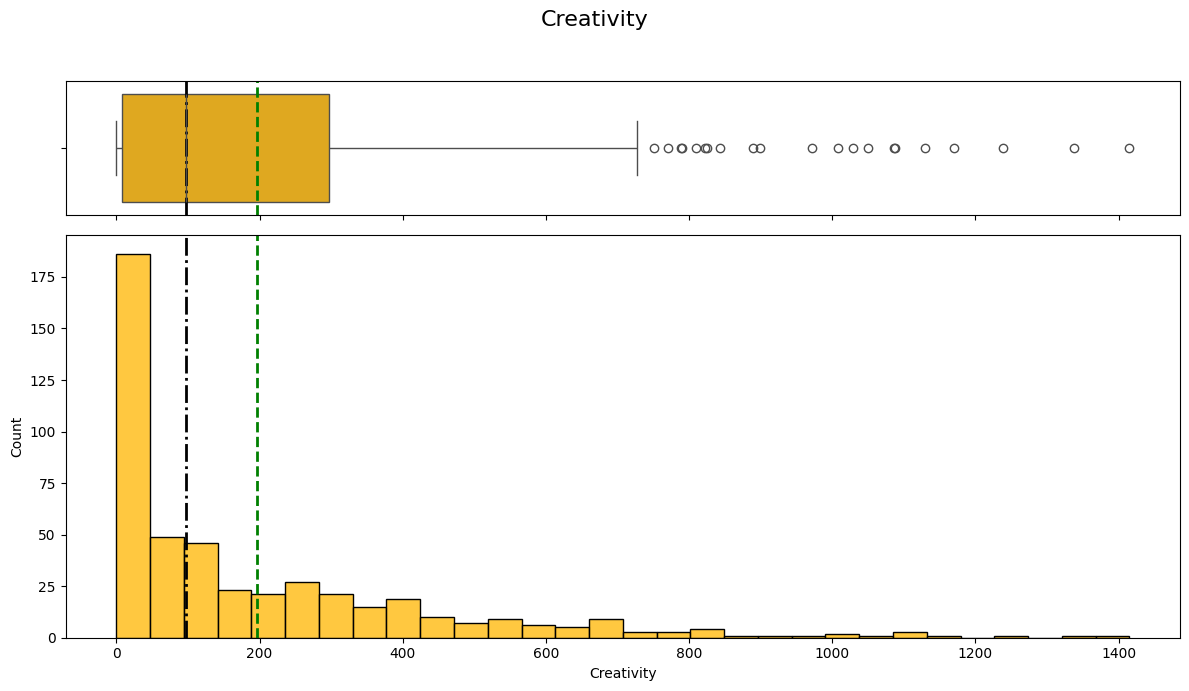


Top 10 performers for Creativity:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.900000,1292.600000,1253,36,13
Mason Mount,Chelsea,Midfielder,6,7,147,2887,32,1336.900000,770.400000,954,16,14
Trent Alexander-Arnold,Liverpool,Defender,2,8,160,3029,40,1238.800000,789.600000,529,26,10
Kevin De Bruyne,Manchester City,Midfielder,6,12,141,1995,17,1170.100000,760.800000,914,19,12
Andrew Robertson,Liverpool,Defender,1,8,161,3384,42,1129.300000,754.400000,359,19,12
Pascal Gross,Brighton and Hove Albion,Midfielder,3,8,116,2479,28,1087.800000,620.400000,415,11,10
Luke Shaw,Manchester United,Defender,1,5,124,2653,33,1085.900000,596.000000,243,22,10
Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.900000,1052.200000,1046,26,13
Jack Grealish,Aston Villa,Midfielder,6,12,135,2183,28,1029.600000,707.400000,917,13,12
Pedro Lomba Neto,Wolverhampton Wanderers,Midfielder,5,8,124,2549,38,1007.300000,594.200000,722,10,9


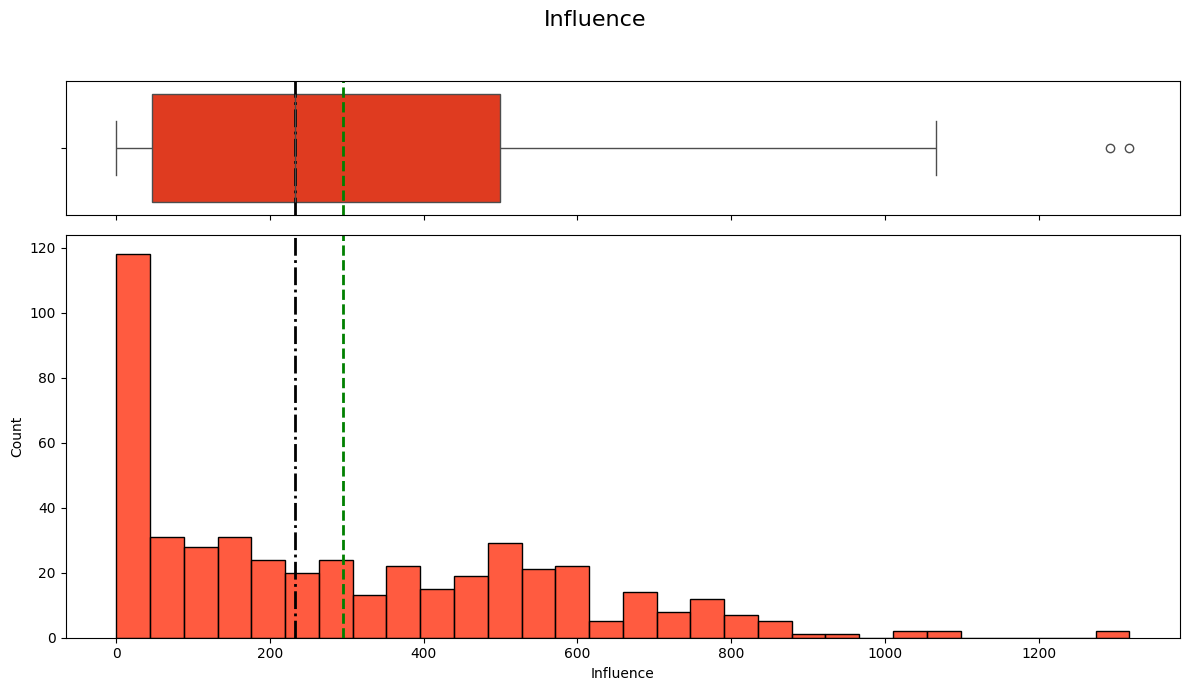


Top 10 performers for Influence:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.100000,1318.200000,1585,40,12
Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.900000,1292.600000,1253,36,13
Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.000000,1067.200000,0,27,15
Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.700000,1056.000000,1980,21,11
Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.900000,1052.200000,1046,26,13
Illan Meslier,Leeds United,Goalkeeper,0,0,154,3150,52,10.000000,1026.000000,0,20,11
James Ward-Prowse,Southampton,Midfielder,8,7,156,3420,68,971.200000,940.000000,355,17,9
Tomas Soucek,West Ham United,Midfielder,10,2,147,3420,47,271.100000,889.800000,925,16,11
Hugo Lloris,Tottenham Hotspurs,Goalkeeper,0,0,149,3420,45,0.000000,868.000000,0,13,12
Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.000000,867.200000,1512,26,10


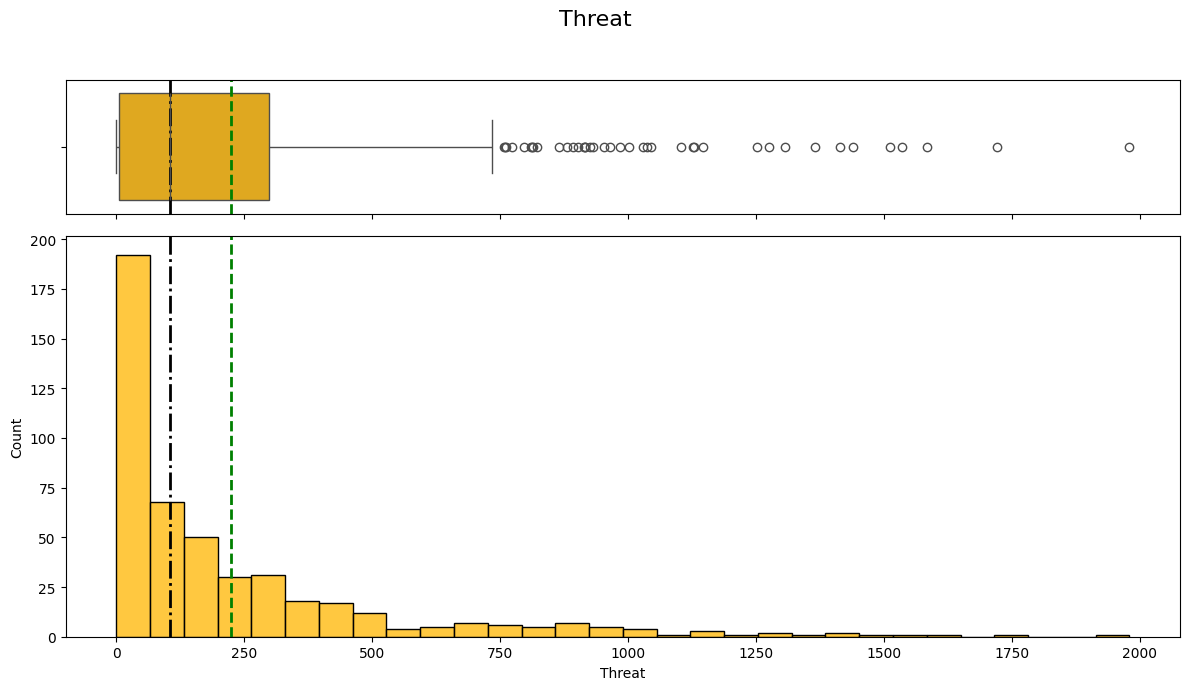


Top 10 performers for Threat:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.700000,1056.000000,1980,21,11
Ollie Watkins,Aston Villa,Forward,14,9,168,3328,46,610.400000,815.400000,1721,18,14
Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.100000,1318.200000,1585,40,12
Sadio Mane,Liverpool,Midfielder,11,11,176,2808,28,809.700000,808.800000,1535,14,12
Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.000000,867.200000,1512,26,10
Dominic Calvert-Lewin,Everton,Forward,16,6,165,2871,39,308.000000,745.800000,1439,21,11
Roberto Firmino,Liverpool,Forward,9,8,141,2837,39,643.200000,729.400000,1415,15,10
Raheem Sterling,Manchester City,Midfielder,10,9,154,2534,23,584.100000,663.400000,1366,10,14
Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.600000,819.200000,1306,23,8
Timo Werner,Chelsea,Forward,6,12,128,2598,29,532.400000,514.800000,1276,7,13


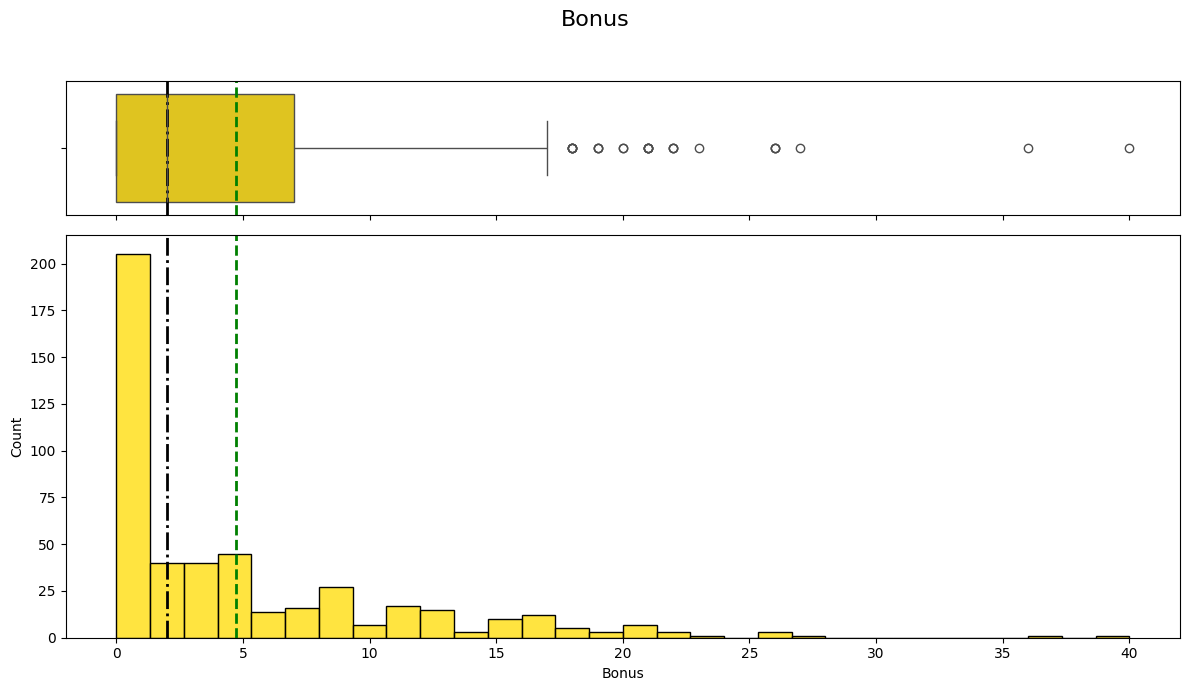


Top 10 performers for Bonus:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.100000,1318.200000,1585,40,12
Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.900000,1292.600000,1253,36,13
Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.000000,1067.200000,0,27,15
Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.000000,867.200000,1512,26,10
Trent Alexander-Arnold,Liverpool,Defender,2,8,160,3029,40,1238.800000,789.600000,529,26,10
Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.900000,1052.200000,1046,26,13
Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.600000,819.200000,1306,23,8
Ilkay Gundogan,Manchester City,Midfielder,13,4,157,2025,16,688.400000,754.600000,712,22,12
Luke Shaw,Manchester United,Defender,1,5,124,2653,33,1085.900000,596.000000,243,22,10
Callum Wilson,Newcastle United,Forward,12,6,134,2081,37,230.400000,557.400000,761,22,5


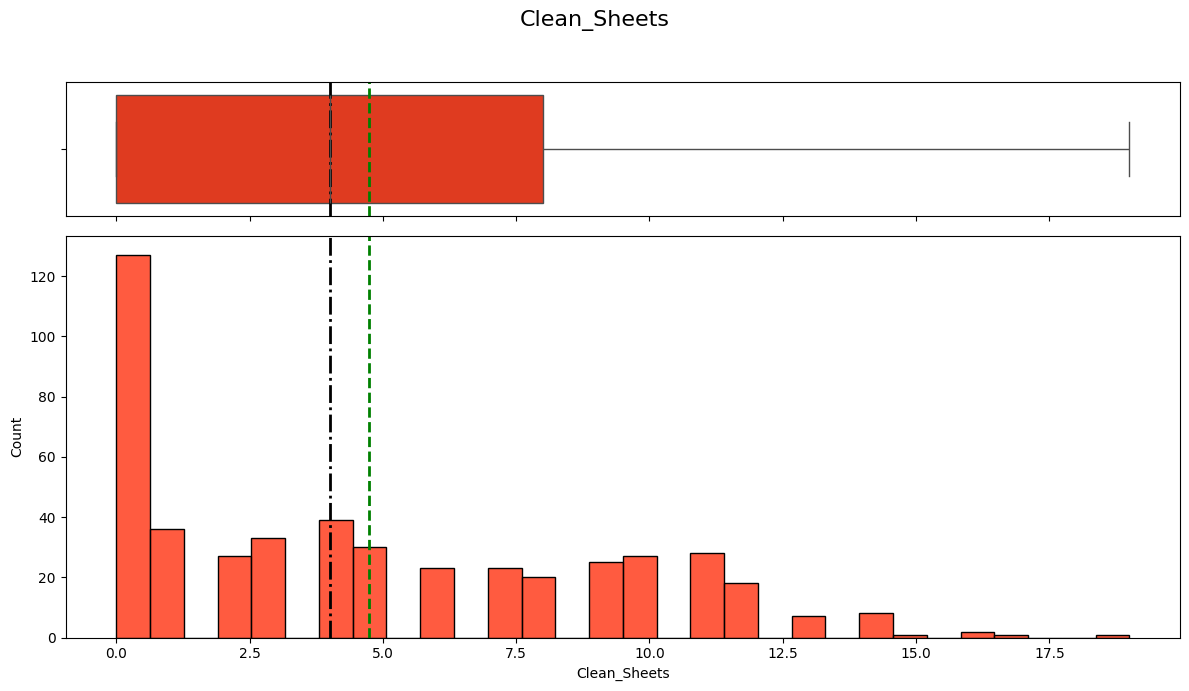


Top 10 performers for Clean_Sheets:



Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Ederson Moares,Manchester City,Goalkeeper,0,1,160,3240,28,10.000000,586.000000,0,3,19
Ruben Dias,Manchester City,Defender,1,1,142,2843,21,91.000000,651.600000,218,12,17
Matt Targett,Aston Villa,Defender,0,4,138,3404,44,607.000000,690.400000,122,9,16
Edouard Mendy,Chelsea,Goalkeeper,0,0,140,2745,25,0.000000,470.200000,0,8,16
Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.000000,1067.200000,0,27,15
John McGinn,Aston Villa,Midfielder,3,7,114,3330,46,600.500000,579.000000,361,2,14
Ollie Watkins,Aston Villa,Forward,14,9,168,3328,46,610.400000,815.400000,1721,18,14
Tyrone Mings,Aston Villa,Defender,2,2,128,3194,42,97.300000,798.400000,293,8,14
Jorge Luiz Frello Filho,Chelsea,Midfielder,7,2,114,2006,17,383.500000,588.800000,175,15,14
Mason Mount,Chelsea,Midfielder,6,7,147,2887,32,1336.900000,770.400000,954,16,14


In [17]:
# Lets automate this to get all column headers and then iterate over the plotting function to produce all plots

# Identify all numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Iterate over each numeric column and call the function
for column in numeric_columns:
    histogram_boxplt_fun(data, column, bins=30)
    print("\n" * 10)  # Add 10 blank lines between plots

## **Categorical Data**

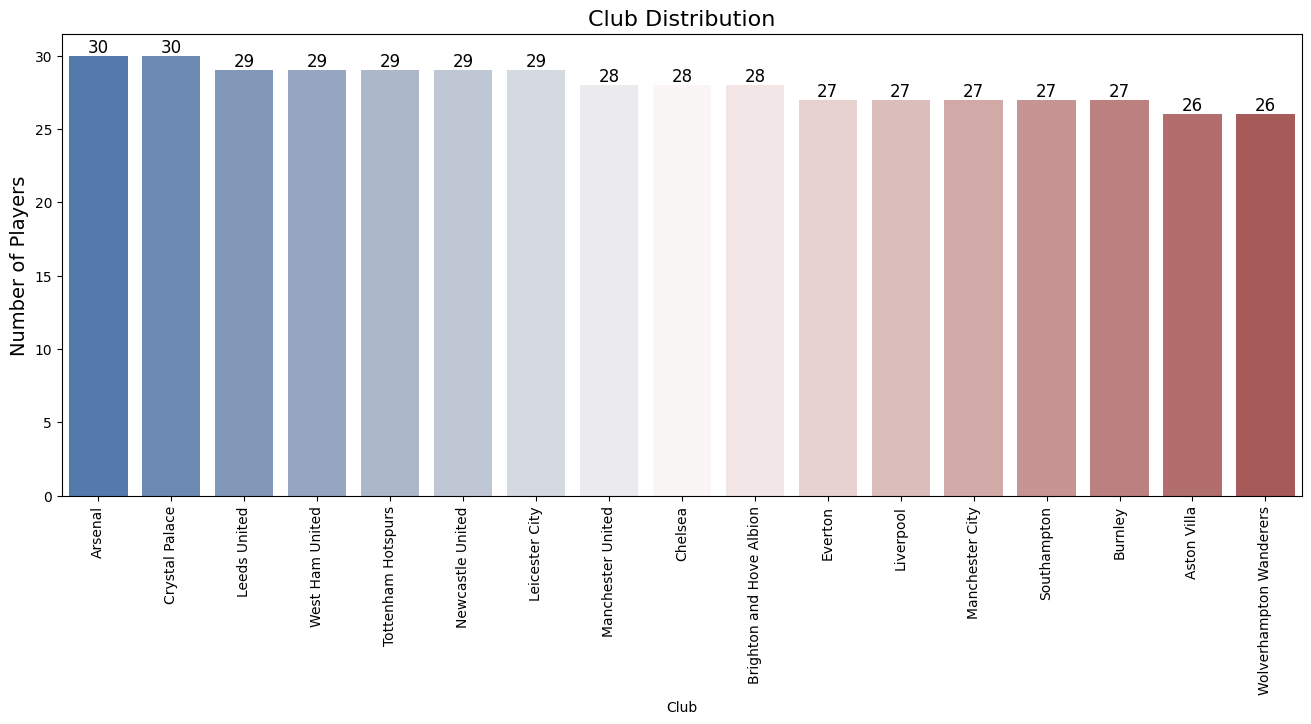

In [18]:
# Plot player per club
# Perform a data manipulation to  change to display order (descending player count)
desc = data.groupby(['Club'])['Player_Name'].count().sort_values(ascending=False).index

palette = sns.color_palette("vlag", n_colors=data['Club'].nunique())
plt.figure(figsize=(16, 6))

# Add chart title
plt.title('Club Distribution', fontsize=16)

# Rotate x axis labels
plt.xticks(rotation=90)

# Set y-axis label
plt.ylabel('Number of Players', fontsize=14)

# Plot each datapoint using a different color in the palette
ax = sns.countplot(data, x = 'Club', palette = palette, order = desc)

# Annotate column with value
for i in range(len(ax.patches)):
  x = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
  y = ax.patches[i].get_height() + 0.6
  ax.annotate(int(ax.patches[i].get_height()), (x, y), ha='center', va='center', fontsize=12)

ax.annotate
plt.show()

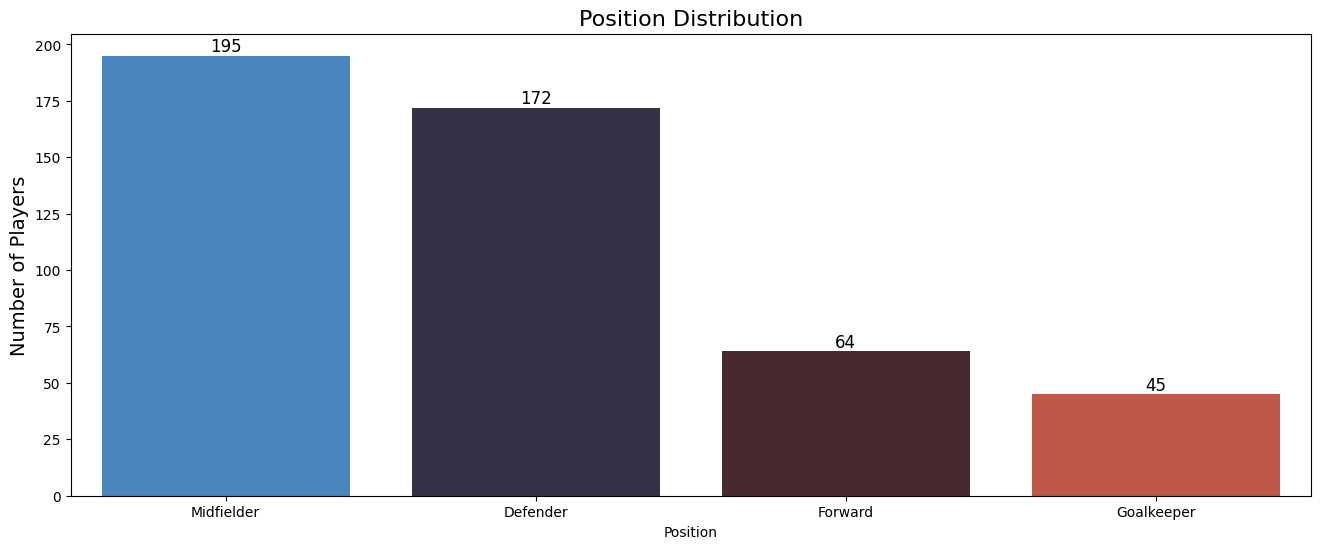

In [19]:
# Plot player per position

#Perform a data manipulation to  change to display order (descending player count)
desc = data.groupby(['Position'])['Player_Name'].count().sort_values(ascending=False).index

palette = sns.color_palette("icefire", n_colors=data['Position'].nunique())
plt.figure(figsize=(16, 6))

# Add chart title
plt.title('Position Distribution', fontsize=16)

# Set y-axis label
plt.ylabel('Number of Players', fontsize=14)

# Plot each datapoint using a different color in the palette
ax = sns.countplot(data, x='Position', palette=palette, order = desc)

# Annotate column with value
for i in range(len(ax.patches)):
  x = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
  y = ax.patches[i].get_height() + 4
  ax.annotate(int(ax.patches[i].get_height()), (x, y), ha='center', va='center', fontsize=12)

ax.annotate
plt.show()

# **Bivariate Analysis**

In [20]:
# Perform correlation

correlation_matrix = data[numeric_columns].corr()
correlation_matrix

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Goals_Scored,1.000000,0.658168,0.696172,0.436865,0.381064,0.554242,0.597638,0.903802,0.738927,0.434619
Assists,0.658168,1.000000,0.701306,0.519280,0.449536,0.825242,0.591190,0.748933,0.666646,0.520733
Total_Points,0.696172,0.701306,1.000000,0.908206,0.801821,0.709679,0.955050,0.723896,0.867282,0.894135
Minutes,0.436865,0.519280,0.908206,1.000000,0.940025,0.613385,0.938259,0.524276,0.676415,0.917858
Goals_Conceded,0.381064,0.449536,0.801821,0.940025,1.000000,0.532461,0.861307,0.458876,0.587797,0.758916
Creativity,0.554242,0.825242,0.709679,0.613385,0.532461,1.000000,0.639369,0.659140,0.638027,0.619753
Influence,0.597638,0.591190,0.955050,0.938259,0.861307,0.639369,1.000000,0.613462,0.817605,0.882480
Threat,0.903802,0.748933,0.723896,0.524276,0.458876,0.659140,0.613462,1.000000,0.687508,0.520807
Bonus,0.738927,0.666646,0.867282,0.676415,0.587797,0.638027,0.817605,0.687508,1.000000,0.670131
Clean_Sheets,0.434619,0.520733,0.894135,0.917858,0.758916,0.619753,0.882480,0.520807,0.670131,1.000000


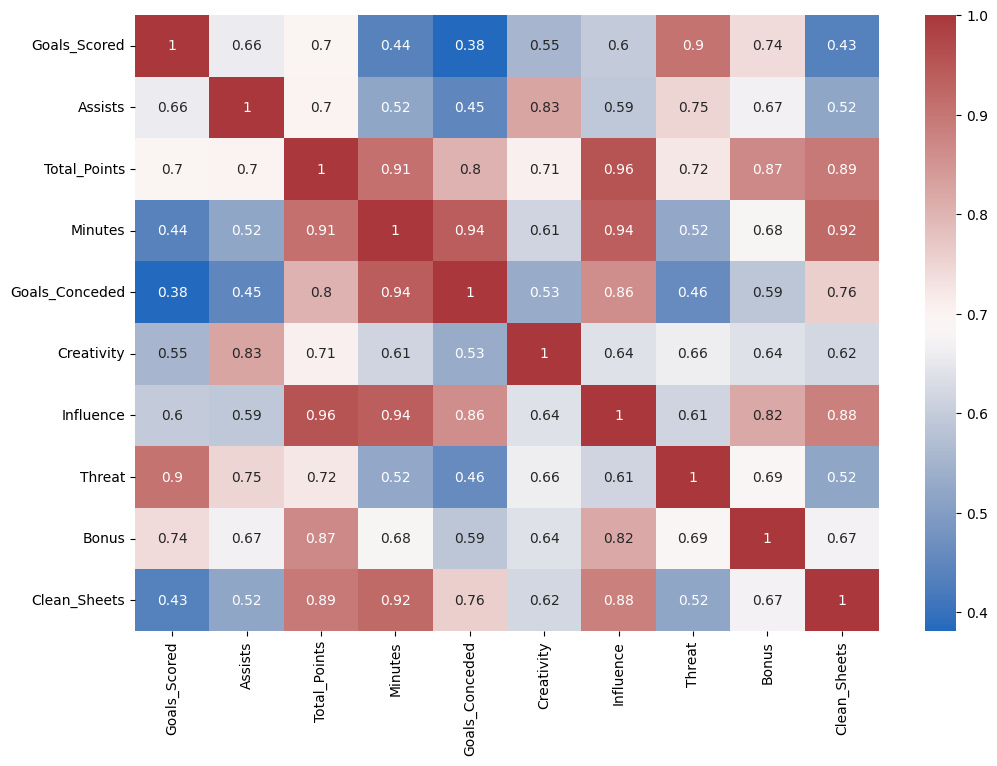

In [21]:
# Plot correlation heatmap

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot = True, cmap='vlag')
plt.show()


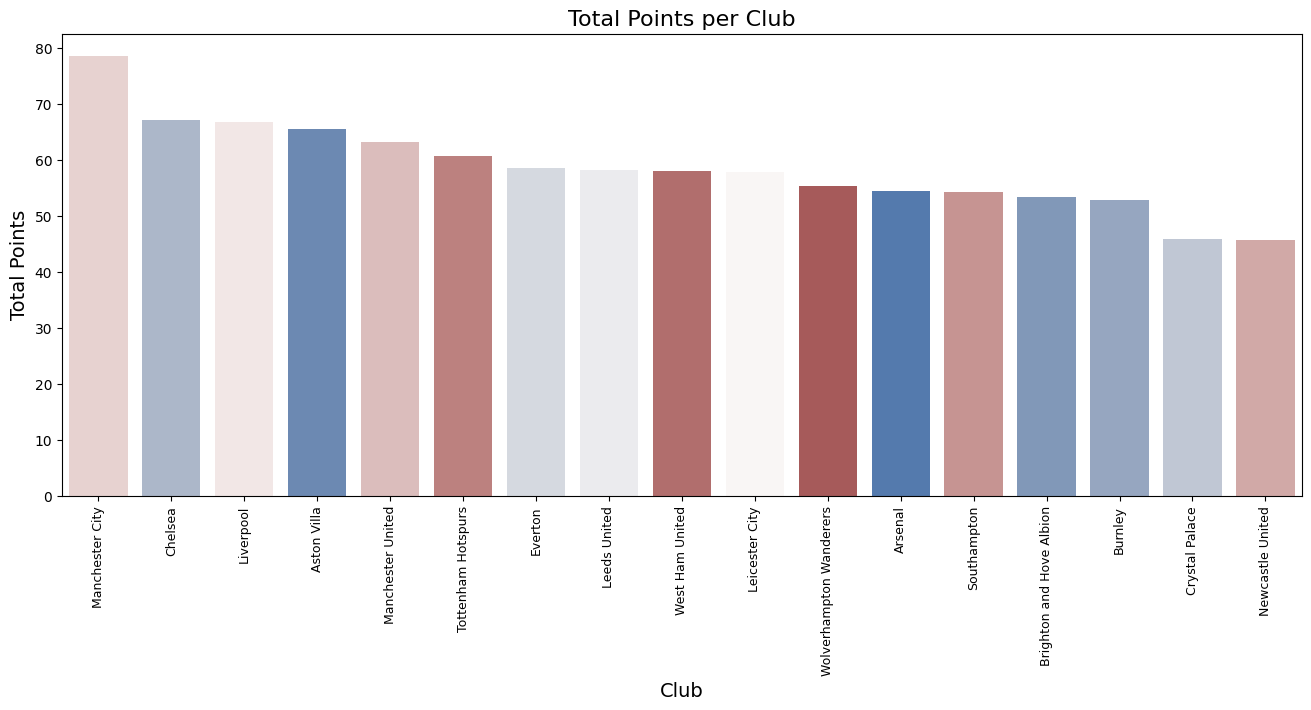

In [22]:
# Plot Total_Points vs Club

palette = sns.color_palette("vlag", n_colors=data['Club'].nunique())
plt.figure(figsize=(16, 6))

sns.barplot(data, y='Total_Points', x='Club', palette = palette, hue='Club', ci = None, order = data.groupby(['Club'])['Total_Points'].mean().sort_values(ascending = False).index)

# Add chart label
plt.title('Total Points per Club', fontsize=16)

# Set y-axis label
plt.ylabel('Total Points', fontsize=14)

# Set x-axis label
plt.xlabel('Club', fontsize=14)

# Rotate x axis lables
plt.xticks(rotation=90, size = 9)

plt.show()

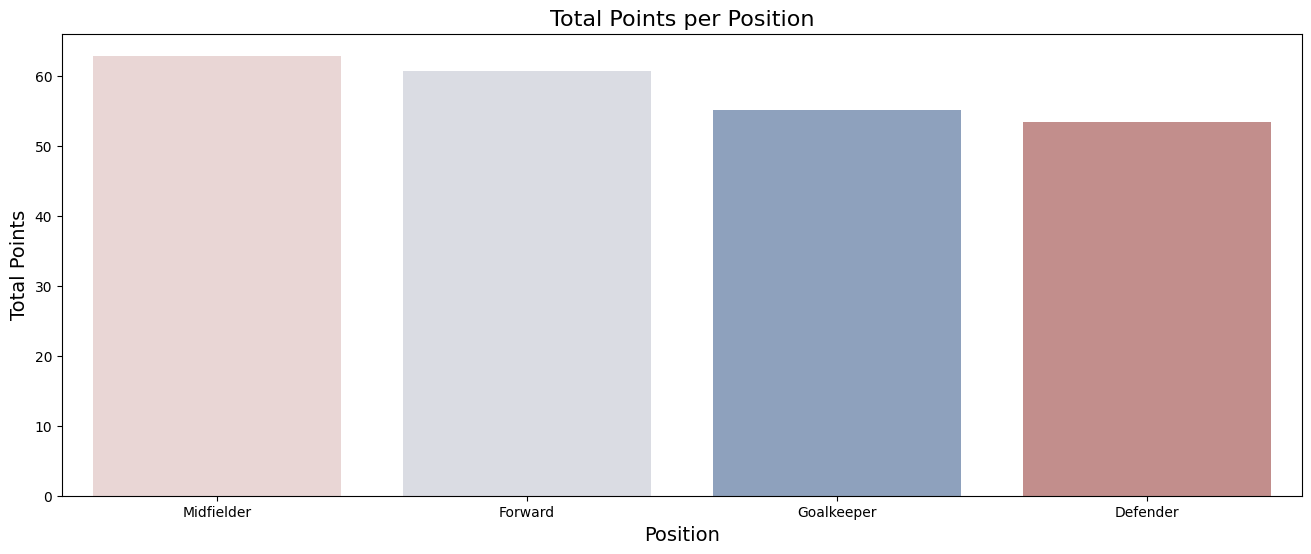

In [23]:
# Plot Total_Points vs Position

palette = sns.color_palette("vlag", n_colors=data['Position'].nunique())
plt.figure(figsize=(16, 6))

sns.barplot(data, y='Total_Points', x='Position', palette = palette, hue='Position', ci = None, order = data.groupby(['Position'])['Total_Points'].mean().sort_values(ascending = False).index)

# Add chart label
plt.title('Total Points per Position', fontsize=16)

# Set y-axis label
plt.ylabel('Total Points', fontsize=14)

# Set x-axis label
plt.xlabel('Position', fontsize=14)

plt.show()

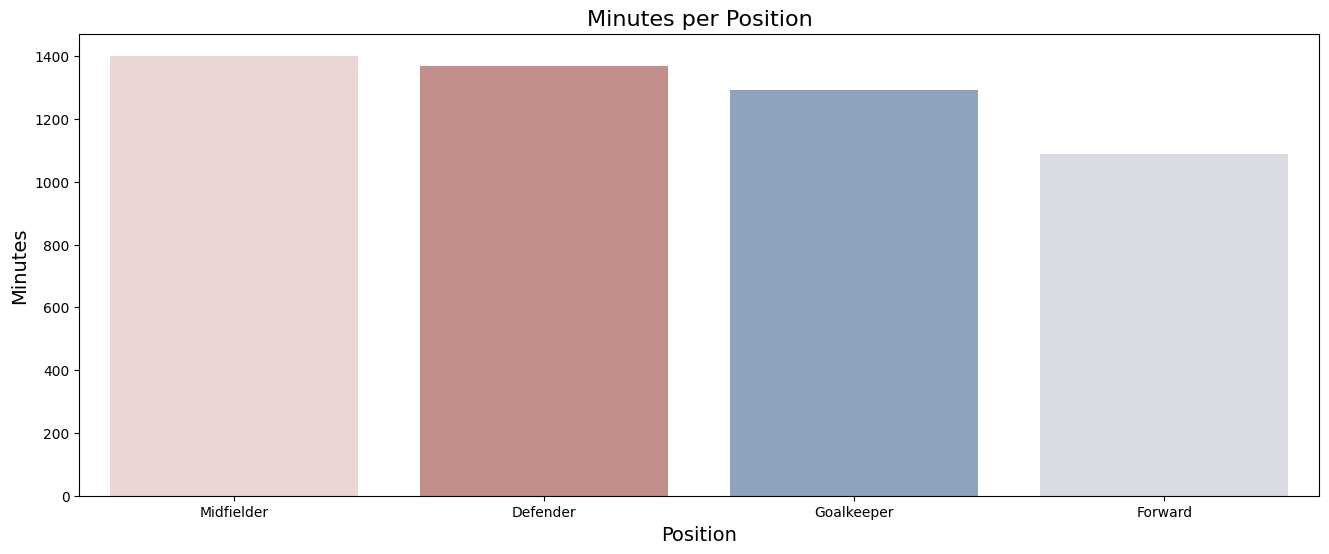

In [24]:
# Plot Minutes vs Position

palette = sns.color_palette("vlag", n_colors=data['Position'].nunique())
plt.figure(figsize=(16, 6))

sns.barplot(data, y='Minutes', x='Position', palette = palette, hue='Position', ci = None, order = data.groupby(['Position'])['Minutes'].mean().sort_values(ascending = False).index)

# Add chart label
plt.title('Minutes per Position', fontsize=16)

# Set y-axis label
plt.ylabel('Minutes', fontsize=14)

# Set x-axis label
plt.xlabel('Position', fontsize=14)

plt.show()

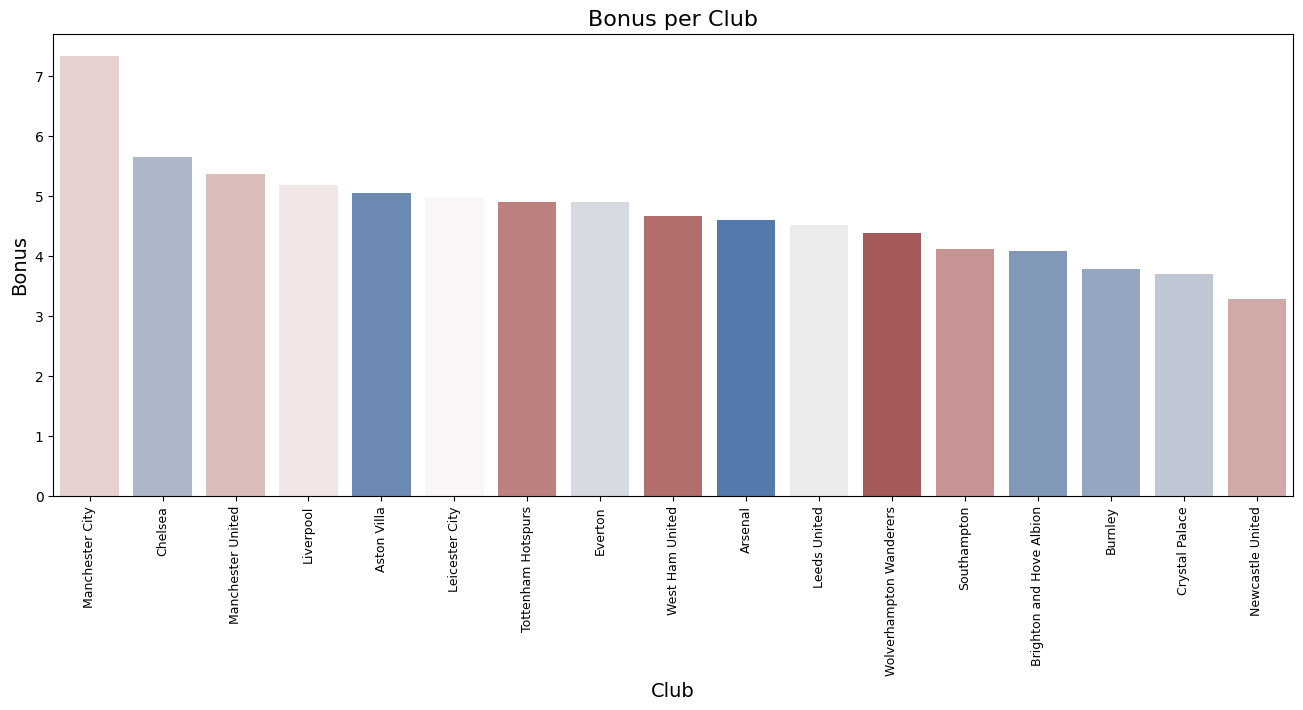

In [25]:
# Plot Bonus vs Club

palette = sns.color_palette("vlag", n_colors=data['Club'].nunique())
plt.figure(figsize=(16, 6))

sns.barplot(data, y='Bonus', x='Club', palette = palette, hue='Club', ci = None, order = data.groupby(['Club'])['Bonus'].mean().sort_values(ascending = False).index)

# Add chart label
plt.title('Bonus per Club', fontsize=16)

# Set y-axis label
plt.ylabel('Bonus', fontsize=14)

# Set x-axis label
plt.xlabel('Club', fontsize=14)

# Rotate x axis lables
plt.xticks(rotation=90, size = 9)

plt.show()

# **Questions**

**Let's see which players sored the most fantasy points last season for different positions of play ?**

In [26]:
# If we didn't care about the name of the player this would be easy
data.groupby(['Position'])['Total_Points'].max()

,Total_Points
Position,
Defender,171
Forward,242
Goalkeeper,186
Midfielder,244


In [27]:
# Get top points scorer for midfielder
dfm = data[data['Position'] == 'Midfielder'].sort_values(by='Total_Points', ascending=False).head(1)
dfm = pd.DataFrame(dfm)

print('Top midfielder \n')
display(dfm)


Top midfielder 



,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13


In [28]:
# Get top points scorer for forward
dff = data[data['Position'] == 'Forward'].sort_values(by='Total_Points', ascending=False).head(1)
dff = pd.DataFrame(dff)

print('Top Scorers forward \n')
display(dff)


Top Scorers forward 



,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12


In [29]:
# Get top points scorer for defender
dfd = data[data['Position'] == 'Defender'].sort_values(by='Total_Points', ascending=False).head(1)
dfd = pd.DataFrame(dfd)

print('Top Scorers defender \n')
display(dfd)


Top Scorers defender 



,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
223,Stuart Dallas,Leeds United,Defender,8,3,171,3410,53,454.6,756.8,527,15,12


In [30]:
# Get top points scorer for goalkeeper
dfg = data[data['Position'] == 'Goalkeeper'].sort_values(by='Total_Points', ascending=False).head(1)
dfg = pd.DataFrame(dfg)

print('Top Scorers goalkeeper \n')
display(dfg)

Top Scorers goalkeeper 



,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
36,Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.0,1067.2,0,27,15


**Let's see which players scored the most fantasy points last season for different positions of play?**

In [31]:
df = pd.concat([dfm, dff, dfd, dfg])
df

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
223,Stuart Dallas,Leeds United,Defender,8,3,171,3410,53,454.6,756.8,527,15,12
36,Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.0,1067.2,0,27,15


# **Outlier Analysis**

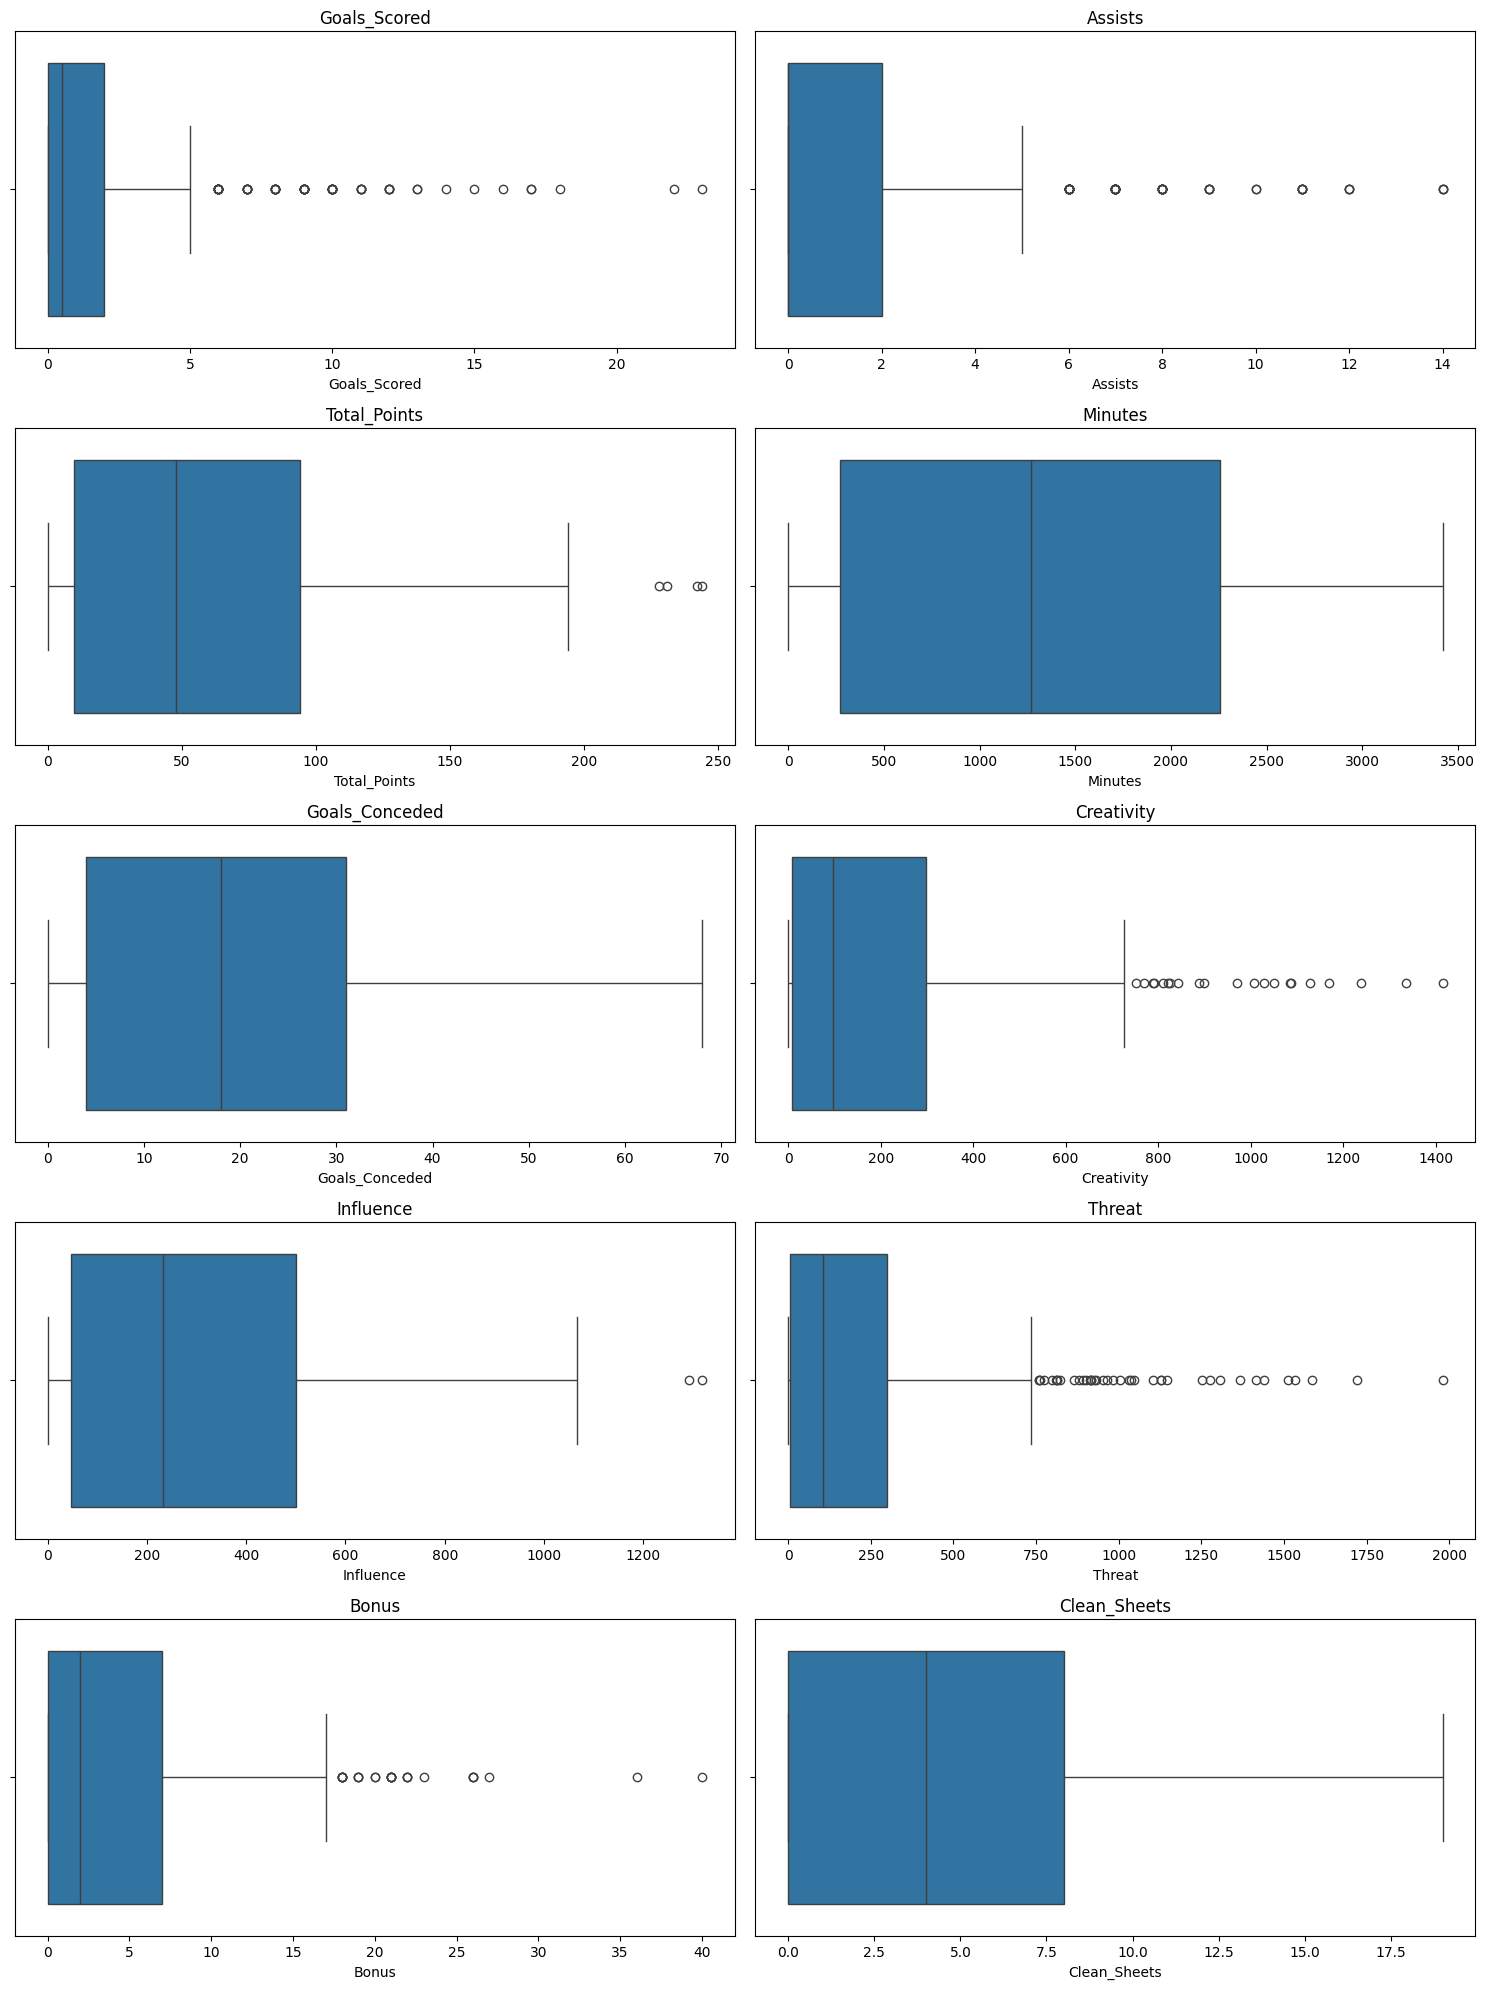

In [32]:
# prompt: plot outlier analysis on all numerical data, use subplots of size 5 x 2

import matplotlib.pyplot as plt
import numpy as np
# Plot outlier analysis on all numerical data, use subplots of size 5 x 2
numeric_columns = data.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


# **Data preprocessing for Clustering**

**Data Normalization**

In [33]:
# Perform linear scaling

from sklearn.preprocessing import StandardScaler

# Select numerical columns for normalization
numerical_cols = ['Goals_Scored', 'Assists', 'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus', 'Clean_Sheets']

# Create a MinMaxScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
scaler.fit(data[numerical_cols])
scaler.transform(data[numerical_cols])

# Replace the original numerical columns with the normalized values
scaled_df = scaler.transform(data[numerical_cols])
scaled_df = pd.DataFrame(scaled_df, columns=numerical_cols)
scaled_df.head()


,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510


# **Principal Component Analysis (PCA)**

In [34]:
pca = PCA(n_components = scaled_df.shape[1], random_state = 0)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df))
pca_df


,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877
...,...,...,...,...,...,...,...,...,...,...
471,-2.686929,0.350179,0.012579,-0.028976,-0.226985,-0.079117,-0.016498,-0.025886,0.114191,0.056974
472,2.333559,-3.137873,-1.051056,0.486420,-0.652311,0.294376,0.067490,0.094238,-0.214251,0.007010
473,-1.966630,0.469243,0.474989,-0.098289,-0.221093,-0.163924,-0.057647,0.129321,-0.267969,-0.017272
474,-0.818000,0.180940,0.103096,-0.112637,0.423414,-0.064093,0.399416,-0.300399,-0.000771,-0.068806


In [35]:
# This table is ov standard deviation in descending oder r column 0 is the 1st principal component
# Lets look at the variance first
pca_df.var()            # pca.explained_variance_ratio_ gives us the same values

,0
0,7.230083
1,1.368810
2,0.589241
3,0.314499
4,0.227933
5,0.152593
6,0.070226
7,0.039455
8,0.019494
9,0.008719


In [36]:
# Here you can see there are a number of columns (features) that really dont vary much, so they don't tell us much about the data

# Lets normalize this var()/sum of the var()
pca_df.var()/pca_df.var().sum()             # pca.explained_variance gives us the same values

,0
0,0.721489
1,0.136593
2,0.058800
3,0.031384
4,0.022745
5,0.015227
6,0.007008
7,0.003937
8,0.001945
9,0.000870


In [37]:
# 72% can be represented by the first column, 13% by the second

sum(pca.explained_variance_ratio_[:5])

0.9710123249796081

In [38]:
# 97% of all the variation of the data can be represented by only 5 features - very useful if our dataset is very large
# Here our data set is small so we will use all of the features for clustering



# **Centroid Based Clustering Techniques (K-Means Clustering)**

In [39]:
# Define the model
model = KMeans(n_clusters = 2)      # We set the # of clusters = 2 beacuse the first two features represent almost 86% of the variation of the data
model.fit(pca_df)


KMeans(n_clusters=2)

In [40]:
# Perform predictions
model.predict(pca_df)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

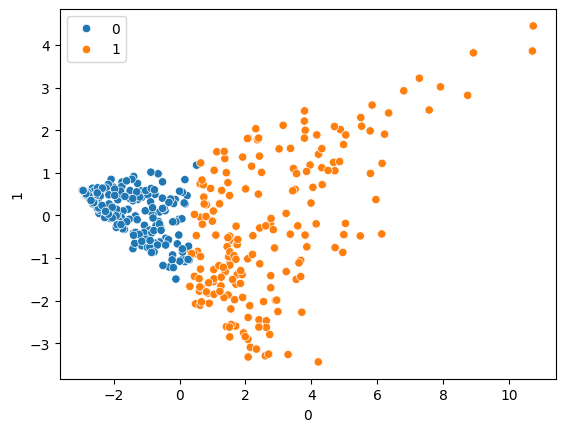

In [41]:
# Lets perform a visualizaton
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=model.predict(pca_df))
plt.show()


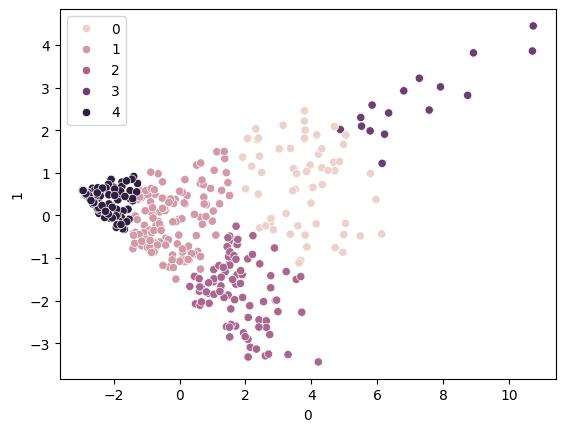

In [42]:
# We could have done this by choosing the number of clusters to be 5

# Define the model
model = KMeans(n_clusters = 5)      # We set the # of clusters = 5 beacuse the first two features represent 97% of the variation of the data
model.fit(pca_df)

# Perform predictions
model.predict(pca_df)

# Lets perform a visualizaton
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=model.predict(pca_df))
plt.show()


In [43]:
# So how do we know which one is better? Use K Elbow model -  determine the distance of each point from its cluster center

# Perfom elbow analysis
clusters_ = range(1, 10)

# Calculate the distortion of the data - if this value is very small out clustering is working very well
distortion = []

for k in clusters_:
    model = KMeans(n_clusters = k)
    Y = model.fit(pca_df)

    # sum(min(cdist(pca_df, model.cluster_centers_), axis = 1)) / pca_df.shape[0]     # This is the calculation of distortion (the minimum distance of each point to its own cluster center)


    distortion.append(
        np.sum(np.min(cdist(pca_df, model.cluster_centers_), axis = 1)) / pca_df.shape[0]
    )



In [44]:
distortion

[2.7730371100978024,
 1.863573678589829,
 1.5612774038101578,
 1.354278223890143,
 1.2888946097049543,
 1.2242272213869854,
 1.160603137458109,
 1.1146260888312889,
 1.067590623381134]

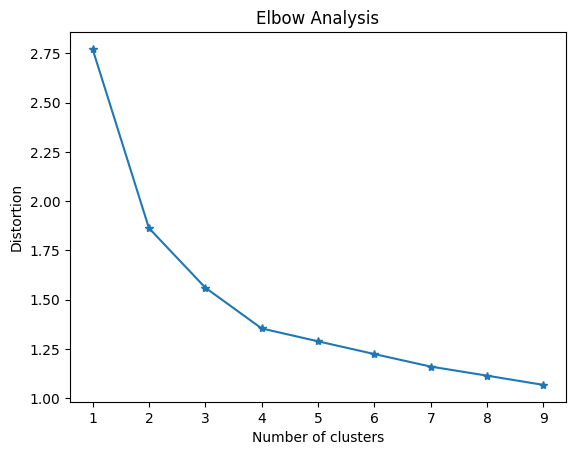

In [45]:
# Lets plot it
plt.plot(clusters_, distortion, '*-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Analysis')
plt.show()

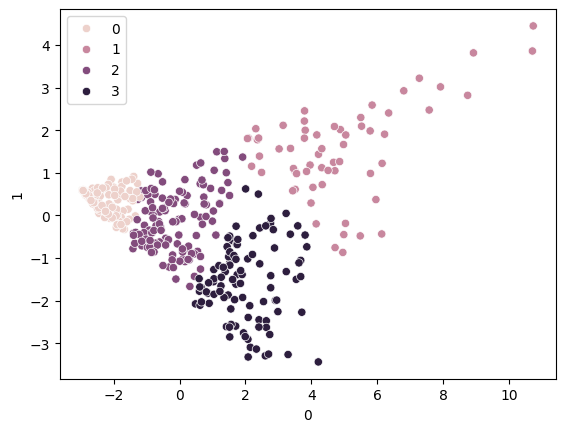

In [46]:
# As you can see 4 appears to the be the optimum number as ts distortion value is already very small

# Define the final model
model = KMeans(n_clusters = 4)
model.fit(pca_df)

# Perform predictions
model.predict(pca_df)

# Lets perform a visualizaton
sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue=model.predict(pca_df))
plt.show()

In [47]:
# Rename the model to a more meanigful name so that we remember this is a fully traind KMeans model
model_kmeans = model

In [48]:
# We will do the same with the scaled dataframe, for later use
df_kmeans = scaled_df.copy()

# Add a new column calld labels to the new dataframe
df_kmeans['labels'] = model_kmeans.labels_ # Remove df_kmeans here
df_kmeans

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,0
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,1
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,3
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,1
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,2
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,0
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,3
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,0
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,2


In [49]:
# Create a cluster profile by grouping by labels and perform the mean
cluster_kmeans = df_kmeans.groupby('labels').mean()
cluster_kmeans

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
labels,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891
1,2.097371,1.806266,1.620631,1.034634,0.890598,1.677926,1.363399,2.062179,1.829804,1.017683
2,-0.129384,-0.055637,-0.055979,0.048985,0.087707,-0.033131,-0.091889,-0.021532,-0.225100,-0.013281
3,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542


In [50]:
# Add information on how many data points is in each
df_kmeans.groupby('labels').count()

# Add information on how many data points is in each for example for Goals_Scored
df_kmeans.groupby('labels')['Goals_Scored'].count()

,Goals_Scored
labels,
0,188
1,61
2,128
3,99


In [51]:
# use the following to make this into an array and call it a new column in te cluster profile
#cluster_kmeans = df_kmeans.groupby('labels').count()                                             # He had this in class, but if I use it it replaces the table with the counts so I left it off
cluster_kmeans['count'] = df_kmeans.groupby('labels')['Goals_Scored'].count().values
cluster_kmeans

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
1,2.097371,1.806266,1.620631,1.034634,0.890598,1.677926,1.363399,2.062179,1.829804,1.017683,61
2,-0.129384,-0.055637,-0.055979,0.048985,0.087707,-0.033131,-0.091889,-0.021532,-0.225100,-0.013281,128
3,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99


In [52]:
# Add styling to highlight max values
cluster_kmeans.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
1,2.097371,1.806266,1.620631,1.034634,0.890598,1.677926,1.363399,2.062179,1.829804,1.017683,61
2,-0.129384,-0.055637,-0.055979,0.048985,0.087707,-0.033131,-0.091889,-0.021532,-0.225100,-0.013281,128
3,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99


In [53]:
# So the best players have the best # of goals, assist, lowest goals conceeded, creativity, influence, threat and bonus, and are the fewest number of players clustered

In [54]:
# Do the same to highlight the minimums
cluster_kmeans.style.highlight_min(color = 'lightgreen')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
1,2.097371,1.806266,1.620631,1.034634,0.890598,1.677926,1.363399,2.062179,1.829804,1.017683,61
2,-0.129384,-0.055637,-0.055979,0.048985,0.087707,-0.033131,-0.091889,-0.021532,-0.225100,-0.013281,128
3,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99


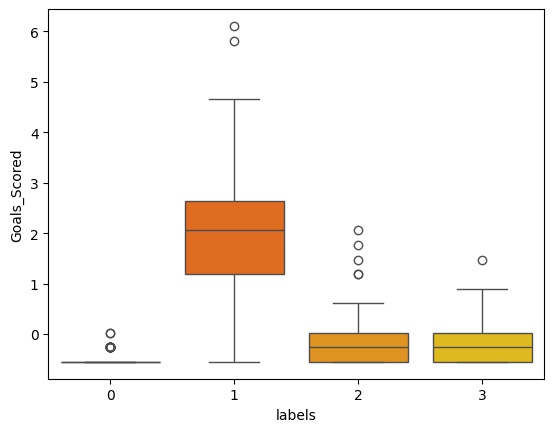

In [55]:
# Here we see the worst players have the lowest stats but are the larget cluster

# Lets visualize this
sns.boxplot(data = df_kmeans, x = 'labels', y = 'Goals_Scored', palette = 'autumn')
plt.show()

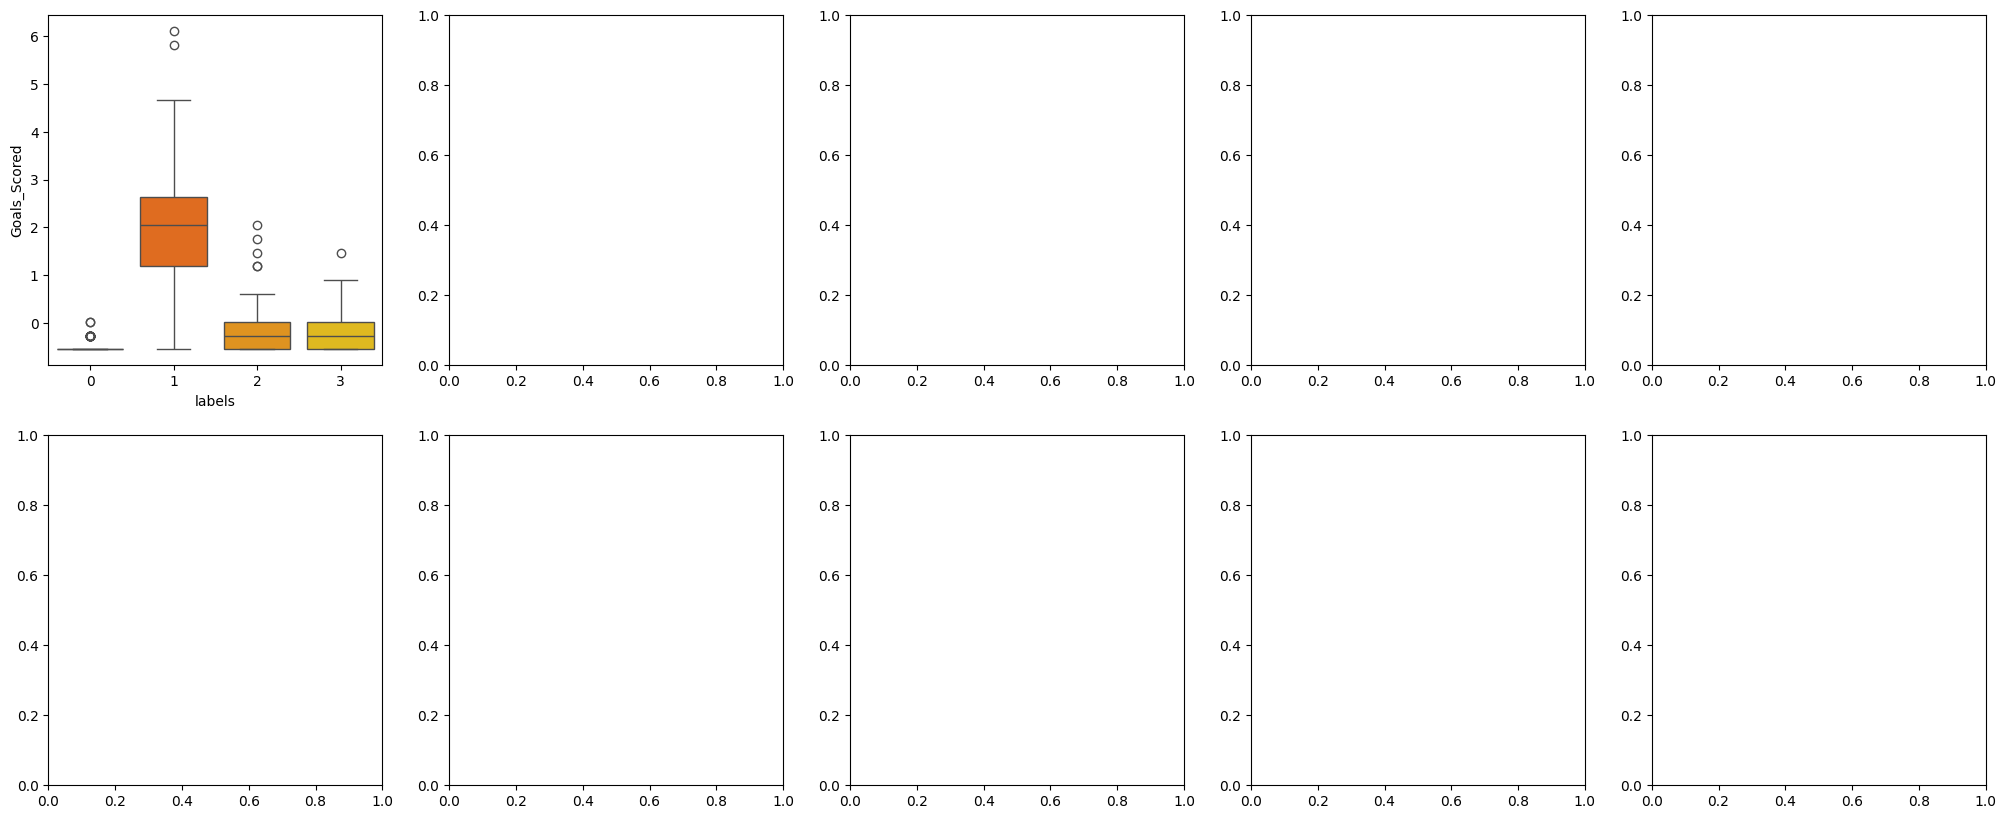

In [56]:
# Lets visualize all of the features in a subplot
fig, ax = plt.subplots(2, 5, figsize = (25, 10))

sns.boxplot(data = df_kmeans, x = 'labels', y = 'Goals_Scored', palette = 'autumn', ax = ax[0][0])  # in this we we can assign plots to locations on the canvas
plt.show()

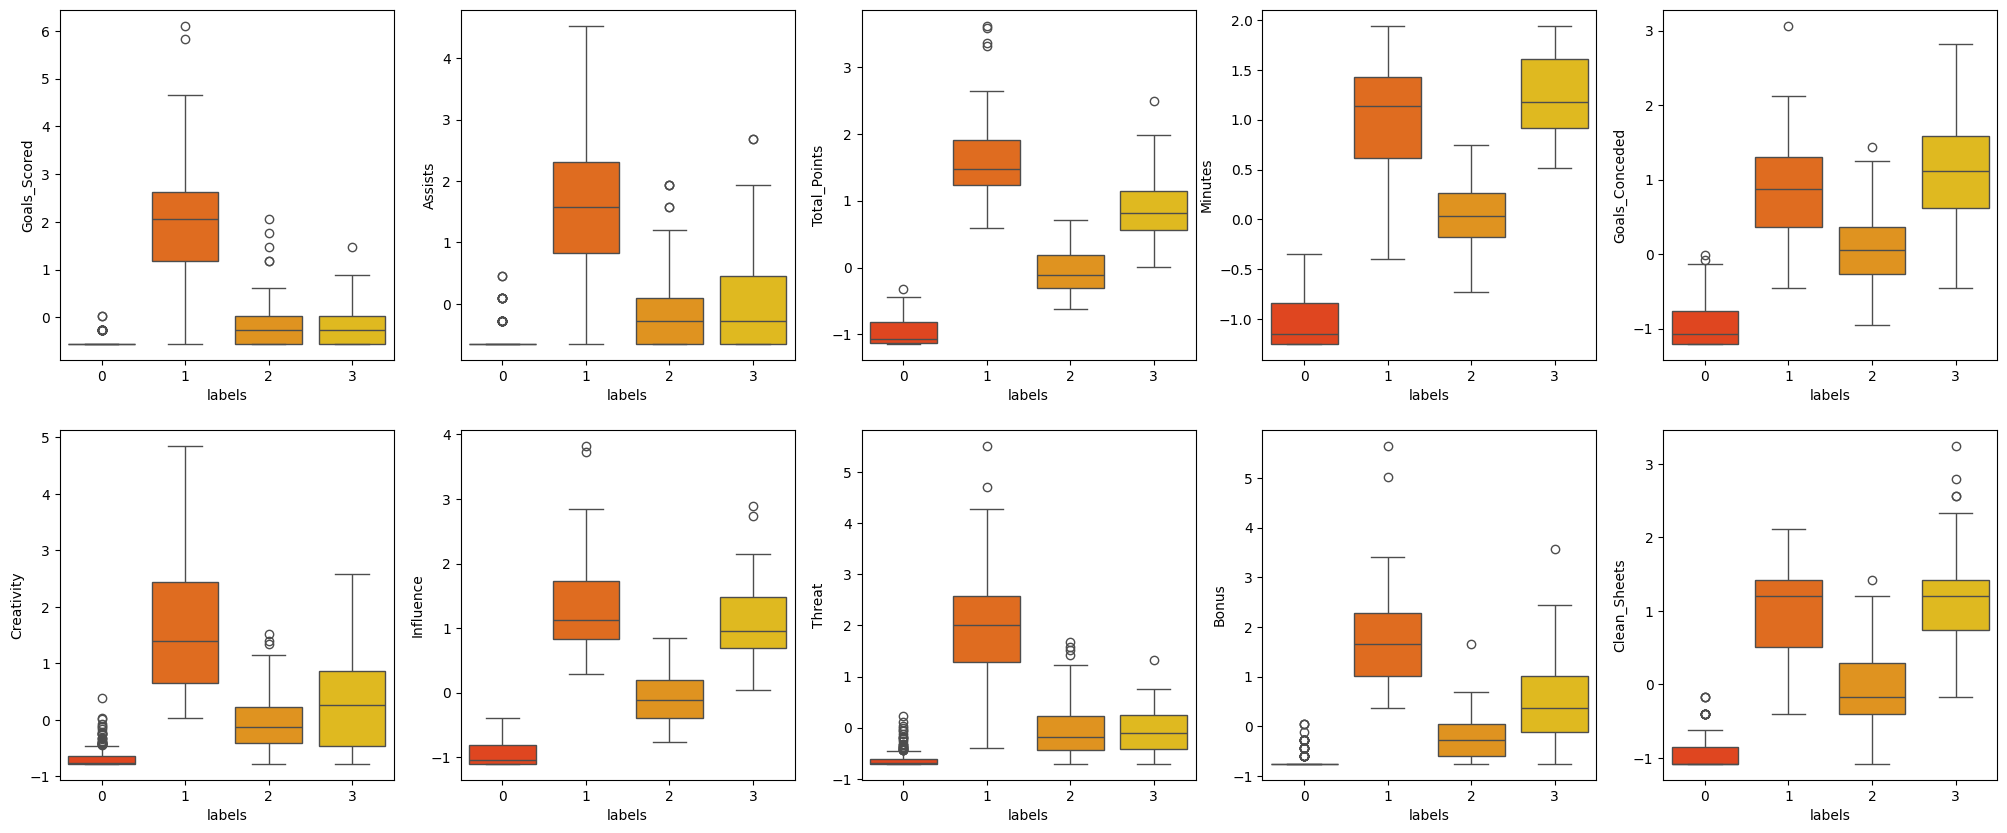

In [57]:
# numerical_cols

# Now lets iterate and put it all together
fig, ax = plt.subplots(2, 5, figsize = (25, 10))

for i in range(2):
  for j in range(5):
    sns.boxplot(data = df_kmeans, x = 'labels', y = numerical_cols[5 * i + j], palette = 'autumn', ax = ax[i][j])

plt.show()

# **K-Medoids Clustering**

In [58]:
# This model varies form K-Means in that the cluster center HAS to be at one of th actual data points
model_kmedoids = KMedoids(n_clusters = 4, random_state = 0)
model_kmedoids.fit(pca_df)
model_kmedoids

KMedoids(n_clusters=4, random_state=0)

In [59]:
# Now that the model is trained, we can make use of this to predict what we have as pca_df results
model_kmedoids.predict(pca_df)

array([3, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 3, 3, 2, 0, 2, 0,
       3, 1, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 3, 1, 1, 1, 3, 0, 3, 3, 0, 3,
       3, 3, 2, 2, 1, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 0,
       3, 3, 3, 3, 1, 3, 0, 1, 2, 0, 0, 3, 3, 1, 2, 2, 2, 1, 3, 2, 0, 3,
       1, 1, 0, 3, 0, 2, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2,
       3, 2, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 2, 0, 2, 3, 3, 1, 2, 0, 2, 1,
       2, 0, 2, 1, 0, 3, 3, 0, 1, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2,
       1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 1, 0, 1, 2, 2, 2, 3, 1, 3,
       3, 0, 3, 0, 0, 3, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 3, 2, 2, 1, 3, 2,
       1, 3, 3, 2, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 0, 3, 3, 1, 0,
       0, 2, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 1, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 1, 0, 3, 2, 2, 2, 3, 1,
       1, 2, 2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 0, 2, 0, 3, 2, 2, 2, 0, 1, 3,
       2, 2, 0, 0, 0, 1, 0, 1, 3, 3, 2, 3, 2, 0, 0,

In [60]:
# We can also see labels
model_kmedoids.labels_

array([3, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 3, 3, 2, 0, 2, 0,
       3, 1, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 3, 1, 1, 1, 3, 0, 3, 3, 0, 3,
       3, 3, 2, 2, 1, 1, 3, 0, 3, 2, 1, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 0,
       3, 3, 3, 3, 1, 3, 0, 1, 2, 0, 0, 3, 3, 1, 2, 2, 2, 1, 3, 2, 0, 3,
       1, 1, 0, 3, 0, 2, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2,
       3, 2, 1, 0, 3, 2, 1, 2, 1, 3, 3, 3, 2, 0, 2, 3, 3, 1, 2, 0, 2, 1,
       2, 0, 2, 1, 0, 3, 3, 0, 1, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2,
       1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 1, 0, 1, 2, 2, 2, 3, 1, 3,
       3, 0, 3, 0, 0, 3, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 3, 2, 2, 1, 3, 2,
       1, 3, 3, 2, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 0, 3, 3, 1, 0,
       0, 2, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 1, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 1, 0, 3, 2, 2, 2, 3, 1,
       1, 2, 2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 0, 2, 0, 3, 2, 2, 2, 0, 1, 3,
       2, 2, 0, 0, 0, 1, 0, 1, 3, 3, 2, 3, 2, 0, 0,

In [61]:
# We can also ge tthe cluster centers
model_kmedoids.cluster_centers_

array([[ 3.51046188e+00,  6.13015951e-01,  5.17543100e-01,
         4.16559904e-01,  1.91935876e-01, -4.05614087e-01,
        -1.16209960e-01, -2.79499146e-01, -4.60994940e-03,
         3.30560801e-02],
       [ 1.67280227e+00, -1.97789388e+00, -2.10774759e-01,
         1.95068237e-01,  2.67423577e-01,  6.57495039e-01,
         6.39145645e-02,  1.53207896e-01,  1.27187492e-01,
        -2.23329239e-03],
       [-6.02559495e-01,  8.15853956e-02,  1.74034547e-01,
        -5.03901510e-02,  3.72457556e-01, -1.67053305e-01,
         2.30252392e-01, -1.07574415e-01, -5.25731756e-02,
         2.69296797e-02],
       [-2.87956766e+00,  5.36519812e-01, -4.10192501e-02,
         1.60248302e-01, -2.38898042e-02,  7.38422238e-03,
        -3.22870576e-02,  2.98649218e-02,  2.53910903e-02,
         1.62620085e-02]])

In [62]:
# make a dataframe for this so we can take a look
pd.DataFrame(model_kmedoids.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9
0,3.510462,0.613016,0.517543,0.416560,0.191936,-0.405614,-0.116210,-0.279499,-0.004610,0.033056
1,1.672802,-1.977894,-0.210775,0.195068,0.267424,0.657495,0.063915,0.153208,0.127187,-0.002233
2,-0.602559,0.081585,0.174035,-0.050390,0.372458,-0.167053,0.230252,-0.107574,-0.052573,0.026930
3,-2.879568,0.536520,-0.041019,0.160248,-0.023890,0.007384,-0.032287,0.029865,0.025391,0.016262


In [63]:
# To see that these are actually data points we have to perform two inverse transformations PCA and standardScaler and place in a dataframe

pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(model_kmedoids.cluster_centers_)))

,0,1,2,3,4,5,6,7,8,9
0,6.000000e+00,5.000000e+00,122.0,2244.0,29.0,644.2,530.6,5.100000e+02,1.300000e+01,1.000000e+01
1,6.661338e-16,2.000000e+00,100.0,2683.0,35.0,84.3,610.4,1.520000e+02,7.000000e+00,1.100000e+01
2,1.000000e+00,1.000000e+00,48.0,1108.0,14.0,210.6,170.6,2.350000e+02,3.000000e+00,5.000000e+00
3,8.881784e-16,7.771561e-15,3.0,45.0,1.0,1.0,11.6,2.273737e-13,1.776357e-15,3.552714e-15


In [64]:
# Lets see if we can then tie this back to the actual player
data[(data['Goals_Scored'] == 6 ) & (data['Total_Points'] == 122)]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
179,Gylfi Sigurdsson,Everton,Midfielder,6,5,122,2244,29,644.2,530.6,510,13,10


In [65]:
# This is proof that the center of one of the clusters is an actual data point form the origin data

# Now lets look at the K-Medoids profile
df_kmedoids = scaled_df.copy()
df_kmedoids['labels'] = model_kmedoids.labels_
df_kmedoids

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,3
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,0
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,1
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,0
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,2
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,3
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,1
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,3
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,2


In [66]:
profile_kmedoids = df_kmedoids.groupby('labels').mean()
profile_kmedoids['count'] = df_kmedoids.groupby('labels')['Goals_Scored'].count().values
profile_kmedoids

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918,82
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229,87
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996,136
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198,171


In [67]:
profile_kmedoids.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918,82
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229,87
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996,136
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198,171


In [68]:
profile_kmedoids.style.highlight_min(color = 'lightgreen')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918,82
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229,87
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996,136
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198,171


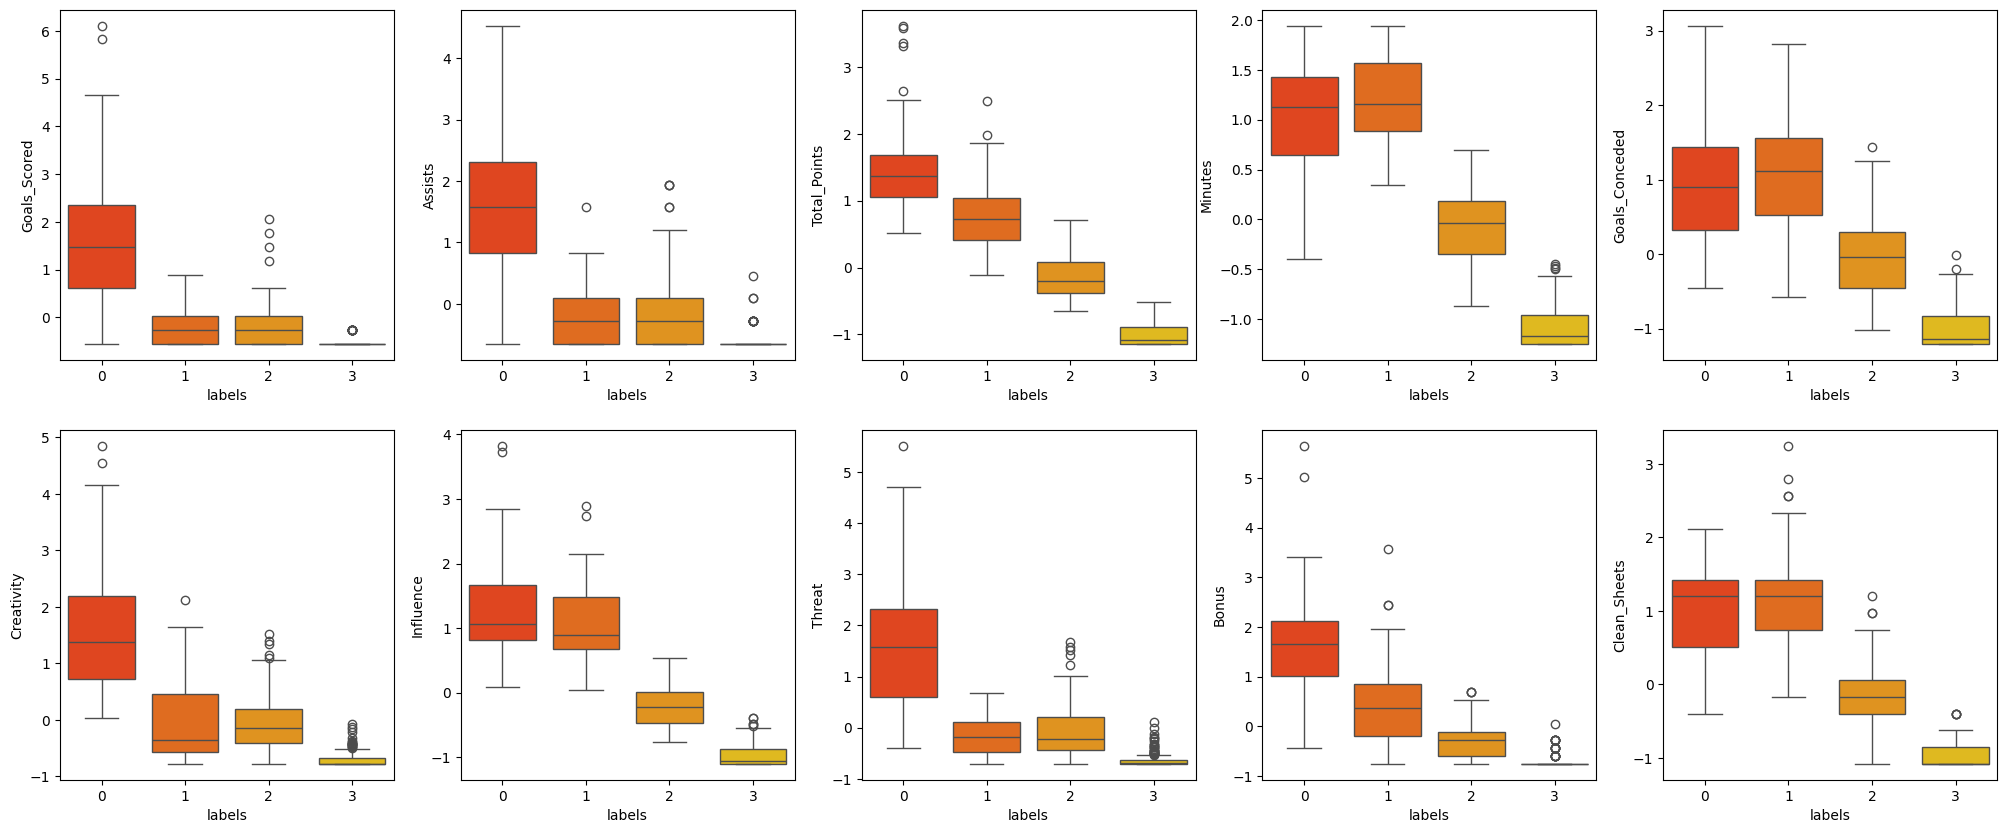

In [69]:
# Lets plot this
fig, ax = plt.subplots(2, 5, figsize = (25, 10))
for i in range(2):
  for j in range(5):
    sns.boxplot(data = df_kmedoids, x = 'labels', y = numerical_cols[5 * i + j], palette = 'autumn', ax = ax[i][j])
plt.show()

# **Hierarchical Clustering**


In hierarchical clustering models can be divided into agglomeritive and divisive types of clustering.

Agglomerative Clustering Technique - you start combinig the data points, one after another, you start with a single data point and then combine it with the closest point, and then combine that with the next and so on, until you have a single data cluster and then you have the granularity of interest, meaning that whatever number fo clusters that you're interested in, you can look at which data points are associated with which clusters.

Divisive Clustering Technique - You ave the entire data set as one cluster, you then divide them into different groups, its basically a top-down approach, compared to the bottom-up approach of Agglomerative clustering.

Create a model

There are two imprtant things to decide:

  1) How you want the distances, the measure of dissimilarity to be computed, in this case you have to define affinity
  
  2) Linkage method, when you have two subclusters and you want to see what the distances are between them

When you want to compute the distance between clusters you can use the minimum distance between any of the two points in the two clusters, or the maximum distance between the two subclusters or the average, for eaxmple the Ward technique is computing or forming the agglomeration of clusters such that sum of the within-cluster variance is minimized.

Here we will use 'complete' - the maximum distance between the linkage

In [70]:
# Agglomerative Clustering
model_agg = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete' )
model_agg.fit(pca_df)
model_agg

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [71]:
# Now that the model is trained, lets look at the labels
model_agg.labels_

array([2, 3, 0, 3, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 3, 2, 2, 0, 0, 0, 2, 3, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 3, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 3, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 2,
       2, 1, 2, 3, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 3, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1,
       3, 2, 0, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 3, 3, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 3, 3, 0, 0, 3, 0, 2, 2, 2, 2, 0, 3, 3,

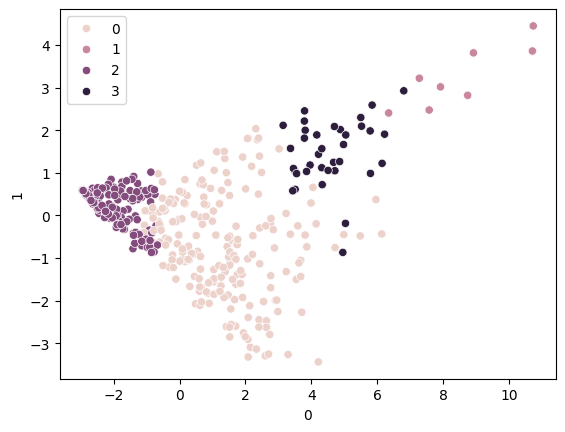

In [72]:
# Lets use the principle component space to visualize  this in 2D space
sns.scatterplot(data = pca_df, x = 0, y = 1, hue = model_agg.labels_)
plt.show()

In general you can compare the clustering techniques using the silhouette coefficient often called the silhouette score.

Another is calculating the cophenetic correleation, teh correlation between a vector of the distances between each pair of points in teh data set and also the distance generated in the dendrogram, after performing he hierarchial clustering.

If they are highly correlated we would say this is a good model.

In [73]:
# Lets find the cluster profile
df_agg = scaled_df.copy()
df_agg['labels'] = model_agg.labels_
df_agg

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,2
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,3
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,0
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,3
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,2
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,2
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,0
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,2
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,0


In [74]:
# Create cluster profile
profile_agg = df_agg.groupby('labels').mean()
profile_agg['count'] = df_agg.groupby('labels')['Goals_Scored'].count().values
profile_agg

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.006329,0.151459,0.539433,0.712591,0.671089,0.320806,0.586843,0.076662,0.305044,0.661053,210
1,4.589442,3.279317,2.905137,1.605111,1.394743,2.004162,2.621353,3.948614,3.467231,1.538650,8
2,-0.475617,-0.544337,-0.860796,-0.895832,-0.816094,-0.630182,-0.846282,-0.568382,-0.659519,-0.863578,222
3,1.950018,1.744500,1.515967,1.010825,0.807953,1.569384,1.212964,2.180359,1.517111,1.127333,36


In [75]:
profile_agg.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.006329,0.151459,0.539433,0.712591,0.671089,0.320806,0.586843,0.076662,0.305044,0.661053,210
1,4.589442,3.279317,2.905137,1.605111,1.394743,2.004162,2.621353,3.948614,3.467231,1.538650,8
2,-0.475617,-0.544337,-0.860796,-0.895832,-0.816094,-0.630182,-0.846282,-0.568382,-0.659519,-0.863578,222
3,1.950018,1.744500,1.515967,1.010825,0.807953,1.569384,1.212964,2.180359,1.517111,1.127333,36


In [76]:
profile_agg.style.highlight_min(color = 'lightgreen')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,-0.006329,0.151459,0.539433,0.712591,0.671089,0.320806,0.586843,0.076662,0.305044,0.661053,210
1,4.589442,3.279317,2.905137,1.605111,1.394743,2.004162,2.621353,3.948614,3.467231,1.538650,8
2,-0.475617,-0.544337,-0.860796,-0.895832,-0.816094,-0.630182,-0.846282,-0.568382,-0.659519,-0.863578,222
3,1.950018,1.744500,1.515967,1.010825,0.807953,1.569384,1.212964,2.180359,1.517111,1.127333,36


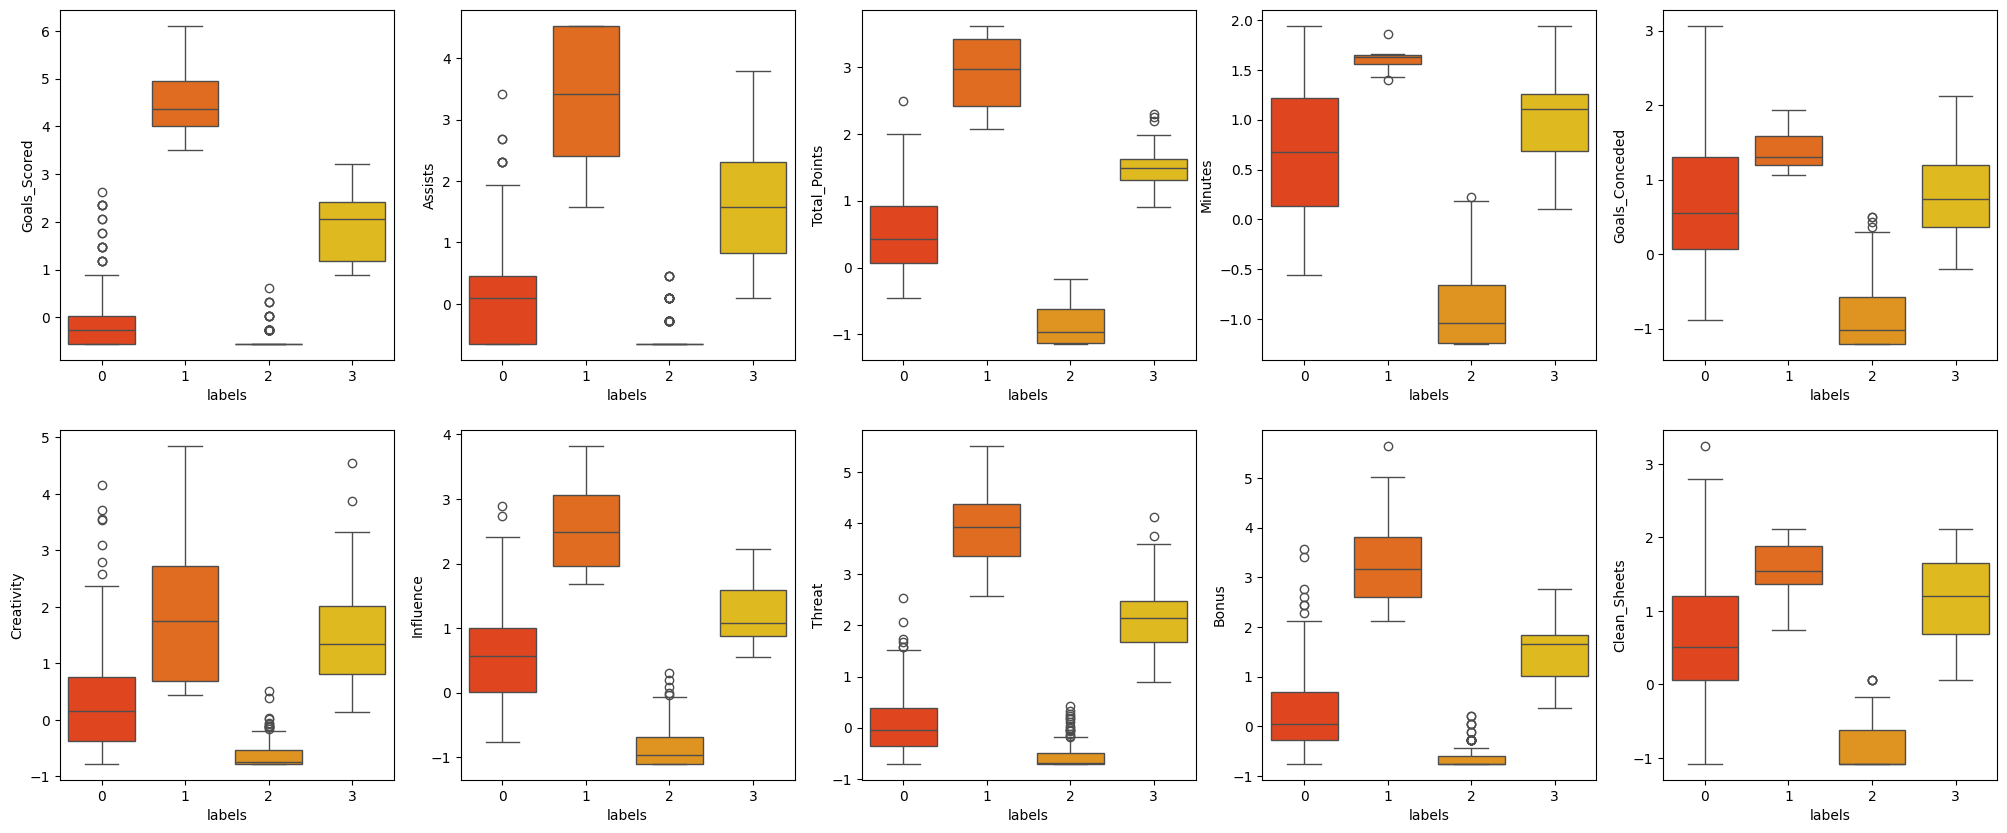

In [77]:
# Lets visualize this
# Lets plot this
fig, ax = plt.subplots(2, 5, figsize = (25, 10))
for i in range(2):
  for j in range(5):
    sns.boxplot(data = df_agg, x = 'labels', y = numerical_cols[5 * i + j], palette = 'autumn', ax = ax[i][j])
plt.show()

In [78]:
# Now lets us the scipy package for performing hierarchal clustering

z = linkage(pca_df, method = 'complete', metric = 'euclidean')
z

array([[ 69.        , 335.        ,   0.        ,   2.        ],
       [396.        , 476.        ,   0.        ,   3.        ],
       [ 16.        ,  17.        ,   0.        ,   2.        ],
       ...,
       [942.        , 947.        ,   8.70136439, 246.        ],
       [913.        , 948.        ,  10.18651816, 468.        ],
       [946.        , 949.        ,  14.56840898, 476.        ]])

In [79]:
# Now that the model is trained, lets force this into a data frame format and define some column names
pd.DataFrame(z, columns = ['node_1', 'node_2', 'distance', 'group_size'])

,node_1,node_2,distance,group_size
0,69.0,335.0,0.000000,2.0
1,396.0,476.0,0.000000,3.0
2,16.0,17.0,0.000000,2.0
3,26.0,478.0,0.000000,3.0
4,28.0,479.0,0.000000,4.0
...,...,...,...,...
470,933.0,939.0,6.437897,8.0
471,944.0,945.0,7.911572,210.0
472,942.0,947.0,8.701364,246.0
473,913.0,948.0,10.186518,468.0


In [80]:
# what we see is that in the first row, node 69 and node 335 are the closest together and they form a group of 2 nodes, and heir distance originally is zero, what does zero mean? Lets look at these two nodes
pca_df.iloc[[69, 335], :]

,0,1,2,3,4,5,6,7,8,9
69,-2.942648,0.588478,-0.03341,0.186024,0.00793,0.007681,-0.020615,0.017924,0.043448,0.011263
335,-2.942648,0.588478,-0.03341,0.186024,0.00793,0.007681,-0.020615,0.017924,0.043448,0.011263


In [81]:
# Here we see that all of their numbers are exactly the same, and that is why their distance is 0, so they will form a new group
# So that group is a new point, basically they have a new number, and that number is 476
# so since the shape showed 475 rows, it will take 474 steps to combine them all into a single group

# Lets see how we can use this for visualization and finding the characteristics of the groups that combine together
# Calculate their cophenetic correlation associated with this model
# (used to compare differently trained hierarchical models, and whichever is the best preserved the original pariwise distance between the points in the dendrogrammatic distance vector)

c, c_dist = cophenet(z, pdist(pca_df))

print(c)                  # This is the cophonetic value
print(c_dist)             # This is the distance between the points in the dendrogram

0.7412041292261757
[10.18651816 10.18651816 10.18651816 ... 10.18651816 10.18651816
  6.01848516]


In [82]:
# Lets see it
np.corrcoef(c_dist, pdist(pca_df))

array([[1.        , 0.74120413],
       [0.74120413, 1.        ]])

In [83]:
# So this is fairly low, so lets try other trained models to find a higher value
distance_ = ['euclidean', 'chebyshev', 'mahalanobis']
linkage_ = ['single', 'complete', 'average']

# find out which i and j provides the maximum c

c_max = -float('inf') # Initialize c_max with a very low value

for i in distance_:
  for  j in linkage_:
    z = linkage(pca_df, metric = i, method = j)
    c, c_dist = cophenet(z, pdist(pca_df))
    print(c)

    if c > c_max:
      c_max = c
      idx_max = (i, j)


0.8430175514228706
0.7412041292261757
0.8476499945585417
0.8381223141111799
0.8028394390632132
0.8167064931302256
0.8065008904132246
0.6583135946489014
0.7747800632434059


In [84]:
c_max

0.8476499945585417

In [85]:
idx_max     # what combination yields the maximum value

('euclidean', 'average')

In [86]:
# Note that we have not used 'Ward', as it only works with euclidian distances, so lets try it and see what happens
distance_ = ['euclidean']
linkage_ = ['single', 'complete', 'average', 'ward']

c_max = -float('inf') # Initialize c_max with a very low value

for i in distance_:
  for  j in linkage_:
    z = linkage(pca_df, metric = i, method = j)
    c, c_dist = cophenet(z, pdist(pca_df))
    print(c)

    if c > c_max:
      c_max = c
      idx_max = (i, j)

0.8430175514228706
0.7412041292261757
0.8476499945585417
0.577773844586155


In [87]:
idx_max

('euclidean', 'average')

In [88]:
# So ward did not work better and 84.7% is he best I can get
# This is the best way to tune our model and find the best distance

z = linkage(pca_df, metric = idx_max[0], method = idx_max[1])

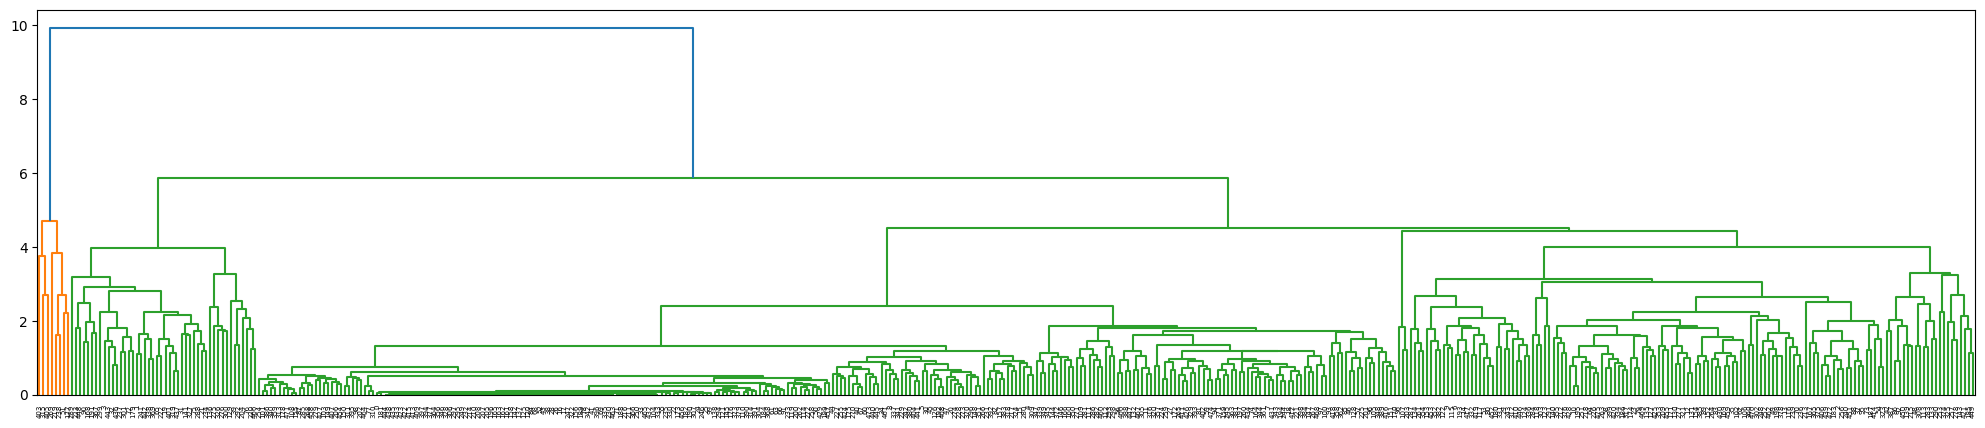

In [89]:
# So lets plot this
plt.figure(figsize = (25, 5))
dendrogram(z);                # This provides the granularity of interest (you can get however many clusters you want to look at (3, 4, 5, etc))


# **Gaussian Mixture Model (GMM)**

There is a main assuption that the data's distrinution is basically Gaussian, an dif you ave multiple features its more like multivariate Gaussian distributions.

As such it tiries to fit a Gaussian distrobution into the data and find the unkown parameters of those distributions and then the mixing coefficients.

This can be used for anonamoly detection, unspervised learning such as clustering, etc.

GMM can be used to perform either hard or soft clustering of the data.

In [90]:
model_gmm = GaussianMixture(n_components = 4, random_state = 0)
model_gmm.fit(pca_df)
model_gmm                 # The model is now trained

GaussianMixture(n_components=4, random_state=0)

In [91]:
model_gmm.predict(pca_df)

array([1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 3, 2, 1, 0, 1,
       2, 2, 0, 2, 2, 2, 1, 3, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2,
       1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 3, 2, 2,
       0, 0, 0, 2, 3, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2,
       1, 3, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 3,
       3, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 3, 2, 2, 0,
       2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 3, 3, 0, 0, 2, 2, 2, 2, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 3, 2, 1, 1, 2, 1, 2, 0, 3,

In [92]:
# Lets create a data frame
df_gmm = scaled_df.copy()
df_gmm['labels'] = model_gmm.predict(pca_df)          # if we call model_gmm.labels_ they don't exist, we would first have to run model_gmm.prediction(pca_df) -  run a prediction on the pca dataframe
df_gmm

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,1
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,0
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,2
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,0
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,2
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,1
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,2
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,2
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,2


In [93]:
# Lets create the profile
profile_gmm = df_gmm.groupby('labels').mean()
profile_gmm['count'] = df_gmm.groupby('labels')['Assists'].count().values        # For each label how many data points were obtained
profile_gmm

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,0.887166,0.971240,0.879850,0.699160,0.678144,1.100427,0.671774,0.947380,0.855182,0.590975,100
1,-0.552608,-0.647555,-1.052078,-1.120496,-1.051170,-0.742336,-1.023342,-0.682313,-0.739193,-1.016743,138
2,-0.293064,-0.281312,0.082814,0.278450,0.271611,-0.213456,0.175596,-0.264850,-0.102715,0.244483,221
3,3.077075,3.200507,2.288226,1.363234,1.013004,2.327848,2.072779,3.409008,2.305321,1.598951,17


In [94]:
profile_gmm.style.highlight_max(axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,0.887166,0.971240,0.879850,0.699160,0.678144,1.100427,0.671774,0.947380,0.855182,0.590975,100
1,-0.552608,-0.647555,-1.052078,-1.120496,-1.051170,-0.742336,-1.023342,-0.682313,-0.739193,-1.016743,138
2,-0.293064,-0.281312,0.082814,0.278450,0.271611,-0.213456,0.175596,-0.264850,-0.102715,0.244483,221
3,3.077075,3.200507,2.288226,1.363234,1.013004,2.327848,2.072779,3.409008,2.305321,1.598951,17


In [97]:
profile_gmm.style.highlight_min(color = 'lightgreen', axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
labels,,,,,,,,,,,
0,0.887166,0.971240,0.879850,0.699160,0.678144,1.100427,0.671774,0.947380,0.855182,0.590975,100
1,-0.552608,-0.647555,-1.052078,-1.120496,-1.051170,-0.742336,-1.023342,-0.682313,-0.739193,-1.016743,138
2,-0.293064,-0.281312,0.082814,0.278450,0.271611,-0.213456,0.175596,-0.264850,-0.102715,0.244483,221
3,3.077075,3.200507,2.288226,1.363234,1.013004,2.327848,2.072779,3.409008,2.305321,1.598951,17


In [ ]:
# Would could continue to explore the characteristics of thes clusters as before

# **Clustering using DBSCAN**

This is a density-based clustering algorithm, specifically the DBSCAN model.

These types of models try to look athe the density of the points which are very close to eachother, and then if it is above a certain threshold, and it's dense enough, it assumes that those data points form a cluster.

If they are very scattered and the points are far away from the den, then a data point is considered as noise, if they are not assigned to another data cluster.

There are some parameters which are important for density based clustering techniques, we will ook at these and see how we can tune it to get the bes possible model out of the DBSCAN models.

Machine learning uses he clustring method DBSCAN to distinguish between high-density and low-density clusters.

**Epsilon (eps) and min_samples are the most important parameters in the DBSCAN.**

In order to find wheter the density of the points ormaing a cluster are good enough, it finds a center point or core for the cluster, that has a radius epsilon - if at the radius to the value of epsilon (in this case we have defined that as three) of that core point if we have at least min_samples (10 is our definition), then hey form a cluster.

In [99]:
# Lets create the model and see how the two important parameters work
model_dbs = DBSCAN(eps = 3, min_samples = 10)
model_dbs.fit(pca_df)
model_dbs

DBSCAN(eps=3, min_samples=10)

In [100]:
# Now we have a trained model
# If we now look at the DBSCAN label, you will see many of them are assigned to zero, some to minus one.
model_dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0

In [101]:
# Lets look at the unique values
np.unique(model_dbs.labels_)

array([-1,  0])

The most impiortant thing is that the points associated with -1 are the outliers. They are not assigned to any cluster, because they are far from the core data point, and we only have one cluster in this data set.

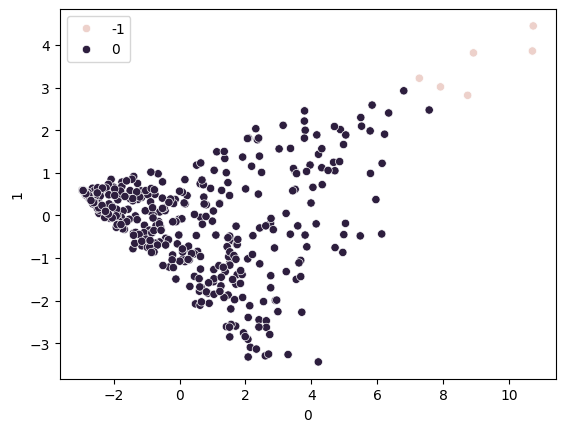

In [102]:
# Lets visualize that
sns.scatterplot(data = pca_df, x = 0, y = 1, hue = model_dbs.labels_)
plt.show()

We can change the values of eps and min_samples and get different distributions

In [103]:
model_dbs = DBSCAN(eps = 3, min_samples = 5)
model_dbs.fit(pca_df)
model_dbs

DBSCAN(eps=3)

In [104]:
model_dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

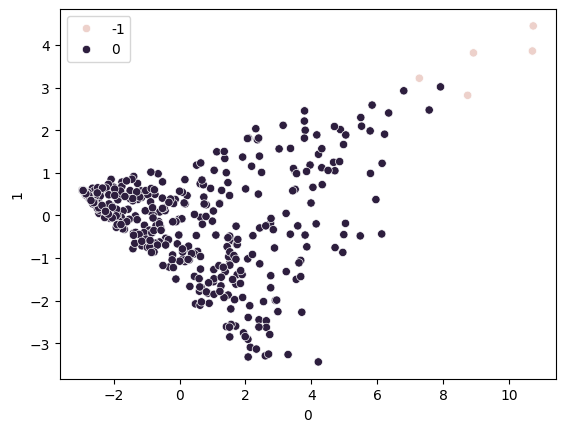

In [105]:
sns.scatterplot(data = pca_df, x = 0, y = 1, hue = model_dbs.labels_)
plt.show()

Not much changed, now lets change the eps to 1.5

[ 0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0
  0  0  0  0  0  0  0  1  1  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0
 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  1  0  0 -1 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 -1  0
  0  0  0 -1  0  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0  0  0  1  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0 -1  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0 -1 -1  0  1 -1  0  0  0  0  0  0  0  0  0  0  1  0  0  1 -1  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0 -1 -1  0 -1  0  0  0  0 -1 -1  0  0  0
  1 -1 -1  0 -1  0  0  0  0  0  0 -1 -1 -1  0 -1  0  0  0  0 -1  0  0  0
  0  0  0 -1  0  0  0  1  0  0  0  0  0 -1 -1  1  0

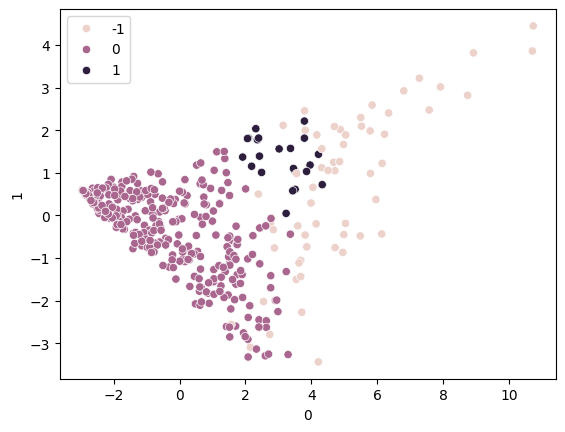

In [108]:
model_dbs = DBSCAN(eps = 1.5, min_samples = 5)
model_dbs.fit(pca_df)

print(model_dbs.labels_)

sns.scatterplot(data = pca_df, x = 0, y = 1, hue = model_dbs.labels_)
plt.show()

Note that some of the data points are still minus one, which are otliers, but we now have two clusters.

The rest are being treated as noise.

How do we find which model is better, how can we tune for epsilon an then the min_sample?

In [117]:
# To tune, assume we have a few options for epsilon
eps_ = [0.5, 1, 2, 3, 4, 5]
min_s_ = [3, 5, 10, 15, 20]

To detremine which is better use silhouette_score.

The silhouette_score is a measure of how separated the clusters are from each other. It calculates the distance of each point to its cluster center and also its closest neighbor cluster.

The ratios should be large enough. The pint associated with one cluster should be away form other clusters. It averages over all data points to get the average silhouette_score.

In [121]:
# Lets assume the max_score is very small
max_score = -float('inf')

for i in eps_:
  for j in min_s_:
    model_dbs = DBSCAN(eps = i, min_samples = j)
    model_dbs.fit(pca_df)
    print(np.unique(model_dbs.labels_))     # Just so we can look at it

    # Calculate the silhouette score
    # This requires there to be more than one cluster so lets perform that check, byt remember one will be noise, so we need to see if there are more than one actual cluster
    if len(np.unique(model_dbs.labels_)) > 1:
      score = silhouette_score(pca_df, model_dbs.labels_)
      print(score)

      if score > max_score:
        max_score = score
        idx_max = (i, j)

[-1  0  1  2  3  4]
0.03706830503123459
[-1  0]
0.3505148065884733
[-1  0]
0.33561855538605684
[-1  0]
0.31654480791443135
[-1  0]
0.3127307717825767
[-1  0  1]
0.34619967131360324
[-1  0  1  2]
0.238447062236738
[-1  0]
0.46081684597157613
[-1  0]
0.4637989004347497
[-1  0]
0.46006267812486407
[-1  0]
0.5719599277943452
[-1  0]
0.5258910630765612
[-1  0]
0.5240489367504121
[-1  0]
0.5122411697457523
[-1  0  1]
0.36478187504220944
[-1  0]
0.6376550045054882
[-1  0]
0.6242051897980097
[-1  0]
0.6188492415713208
[-1  0]
0.6188492415713208
[-1  0]
0.6188492415713208
[0]
[0]
[0]
[-1  0]
0.6626466090568284
[-1  0]
0.6626466090568284
[0]
[0]
[0]
[0]
[0]


This says that in the first case we have 5 different clusters, with noise as well (remember -1 is a data points not associated with any cluster), the silhouette_score is very low.

For the rows showing only [0], those are being disregarded.

Let's see which one provides the best result.

In [122]:
idx_max

(4, 15)

In [123]:
max_score

0.6626466090568284

If eps = 4, and min_samples = 15 we get our highest score of 0.66

Lets use that information

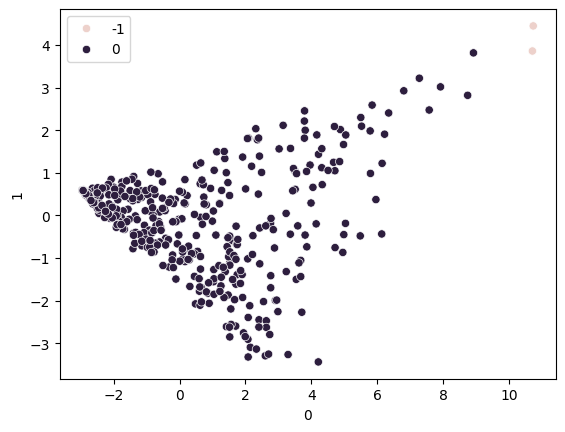

In [124]:
model_dbs = DBSCAN(eps = 4, min_samples = 15)
model_dbs.fit(pca_df)


sns.scatterplot(data = pca_df, x = 0, y = 1, hue = model_dbs.labels_)
plt.show()

We see that ther are only two data points that are considered noise, the rest are in one data cluster.

We can find the profile and explore the cluster as we have done above.

What are the two data points  that are outliers?

In [125]:
df_dbs = scaled_df.copy()
df_dbs['labels'] = model_dbs.labels_
df_dbs

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,0
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,0
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,0
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,0
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,0
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,0
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,0
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,0
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,0


In [126]:
# If lables equal -1, what are the characteristics
df_dbs[df_dbs['labels'] == -1]

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
315,4.661866,4.526676,3.619915,1.644616,1.057317,4.852129,3.730800,3.233780,5.008204,1.880359,-1
403,6.110330,4.526676,3.580883,1.627835,1.245648,1.843542,3.826501,4.278114,5.648609,1.652553,-1


In [128]:
# Lets find out who those two players are using the origin data frame
data.iloc[[315, 403], :]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12


This means these two a re top players and are considered way different from the rest of the players.

The rest for a single cluster.

That is the way we can train and tune our DBSCAN model for optimum results.

Let's emphasis that you could have sued the silhoutte_score to compare different cateoried of models that we developed.

For example we have already developed the model of the K-Means, K-Metoids, Agglomerative Clustering, GMM, ad now DBSCAN.

So if we put these in a list and calculate the silhouette_score associated with each of these models.

In [130]:
models_ = [model_kmeans, model_kmedoids, model_agg , model_gmm, model_dbs]

for i in models_:
  try:
    score = silhouette_score(pca_df, i.predict(pca_df))   # where i.predict(pca_df) is in essence i.labels_
  except:
      score = silhouette_score(pca_df, i.labels_)
  print(f"The {i} model's score is : {score}")

The KMeans(n_clusters=4) model's score is : 0.404132135846063
The KMedoids(n_clusters=4, random_state=0) model's score is : 0.3938224989846948
The AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4) model's score is : 0.4263196927920171
The GaussianMixture(n_components=4, random_state=0) model's score is : 0.2673999434310547
The DBSCAN(eps=4, min_samples=15) model's score is : 0.6626466090568284


Sowe can colclude since DBSCAN has the highest score and is the best model.

Remeber though, none of them are super tuned because we didn't try enough parameters, so we would need to tune their hyperparameters to find the absolute best model.